# <center> Exploratory Data Analysis and Feature Engineering
<hr>

## <center> Computer Price Prediction (Data Science)

### Computers-Price-Predictor - Desktop and Labtop Computer
• Web-based application that predicts the price of the laptop and Desktop according to the newwegg.com in saudi arabia and global  website.

### • The project includes six major stages of the ML life cycle to result in structured, practical business value.
1- Data Collection 
2- Web Scapping
3 - Feature Engineering
4 - Feature Transformation
5 - Machain Learning
6 - Deployment

###  Business Problem
#### - Predict the Price of Desktop and laptop on the basis of many Features

Machine Leaning Problem It is a Regresion problem, for a given columns we need to predict the price of laptop.

Performance Metric

R2 Score

### Problem Statement
 - still have a lot of missing values that we haven't filled in yet. The next step is that we are going to fill in the missing values

## Table of Contents


In [64]:
import pandas as pd

In [65]:
# EDA
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
# Data Preprocesing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
# display all the columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Plots settings
# Standard figure size for all
sns.set(rc={'figure.figsize': [15, 7]}, font_scale=1.2)
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')


<hr>

## <center> Reading data and basic stats

In [66]:
pd.set_option('max_colwidth', 20)
All_Data1 = pd.read_csv("../Data Preprocessing/Feature Engineering/CSV/df_After_Clean.csv", low_memory=False)
All_Data1.drop(All_Data1.filter(regex="Unname"), axis=1,
               inplace=True)  # Remove Unnamed Column
All_Data1.sample(2)

Title_Product      Brand                Model       Series   Color  Date_First_Year      Product_Type Product_Style Product_Usage    Weight CPU_Brand CPU_Model CPU_Series CPU_Gen  Cores  CPU_Speed   Core_Name GPU_Brand GPU_Model  Video_Memory  Is_SSD  Storage_HDD  Storage_SSD SSD_Type  Memory_capacity Memory_Type  Memory_Speed OS_Corporation      OS_Version  Screen_Size   X_res  Y_res Res_Type  Touchscreen  WideScreen Screen_Tec WebCam  AC_Power  Battery_Cell  Power_Supply_W  Bluetooth  Bluetooth_V  Ethernet WiFi_Ver  Has_Thunderbolt  Type_C_Count  Type_A_Count  USB_C_Ver  Product_Price_US  Product_Price_SR  Shipping_Price  Total_Price          Product_URL       Product_Images
21661  Refurbished: Pan...  Toughbook  Toughbook CF-53 MK2    Toughbook   Black           2022.0  Labtop Computers          Thin      Business  2.648979     Intel      Core         i5     3rd    2.0        2.6  Ivy Bridge     Intel  Graphics           NaN    True          0.0          256      M.2              8.0        DDR4           NaN      Microsoft  Windows 10 Pro         14.0  1366.0  768.0      FHD         True       False        IPS    Yes       NaN           NaN             NaN       True          4.0     False   Wifi 4             True           2.0           2.0  USB C 3.2        589.000000           3509.40             0.0      3509.40  https://www.newe...  ['https://c1.new...
13650  Excellent Grade ...      APPLE               830 G5  MacBook Air  Silver           2020.0  Labtop Computers          Thin      Business  1.315418     Intel      Core         i5     1st    2.0        1.8   Kaby Lake     Intel  Graphics           NaN    True       1024.0         1024      NaN              8.0        DDR4           NaN          Apple           MacOS         13.3  1440.0  900.0      FHD        False       False     Glossy    Yes      80.0           NaN             NaN      False          NaN     False   Wifi 5             True           2.0           2.0  USB C 3.1        616.256522           2834.78             0.0      2834.78  https://www.newe...  ['https://c1.new...

In [67]:
# Drop unkown Categories Rows
All_Data1=All_Data1.dropna(subset=['Product_Type','Brand'])

In [68]:
All_Data1.shape

(28881, 54)

In [69]:
All_Data1.head()

Title_Product   Brand           Model               Series  Color  Date_First_Year      Product_Type Product_Style  Product_Usage    Weight CPU_Brand CPU_Model CPU_Series CPU_Gen  Cores  CPU_Speed Core_Name GPU_Brand GPU_Model  Video_Memory  Is_SSD  Storage_HDD  Storage_SSD SSD_Type  Memory_capacity Memory_Type  Memory_Speed OS_Corporation        OS_Version  Screen_Size   X_res   Y_res Res_Type  Touchscreen  WideScreen Screen_Tec WebCam  AC_Power  Battery_Cell  Power_Supply_W  Bluetooth  Bluetooth_V  Ethernet WiFi_Ver  Has_Thunderbolt  Type_C_Count  Type_A_Count  USB_C_Ver  Product_Price_US  Product_Price_SR  Shipping_Price  Total_Price          Product_URL       Product_Images
4  Lenovo IdeaPad G...  LENOVO      82K200XXUS  IdeaPad Gaming 3...  Black           2022.0  Labtop Computers          Thin       Personal  2.249818       AMD     Ryzen    Ryzen 5     5th    6.0        3.3       NaN    NVIDIA   GeForce           4.0    True          0.0          512     NVMe              8.0        DDR4        3200.0      Microsoft  Windows Home Pro         15.6  1920.0  1080.0      FHD        False       False        IPS    Yes       NaN           NaN           170.0       True          5.0     False   Wifi 6             True           2.0           2.0  USB C 3.2            849.99          4709.954             0.0      4709.95  https://www.newe...  ['https://c1.new...
5  HP Pavilion 15 L...      HP  HP Pavilion 15               Raider    Red           2022.0  Labtop Computers          Thin       Personal  2.249818     Intel   Pentium        NaN     1st    4.0        1.1       NaN     Intel  Graphics           4.0    True          0.0          256     NVMe              8.0        DDR4        3200.0      Microsoft   Windows 10 Home         15.6  1366.0   768.0      FHD        False       False        IPS    Yes       NaN           NaN           170.0      False          NaN     False   Wifi 6             True           5.0           6.0  USB C 3.0            429.00          2773.400             0.0      2773.40  https://www.newe...  ['https://c1.new...
6  ASUS TUF Gaming ...    ASUS  HP Pavilion 15        TUF Gaming 15   Gray           2022.0  Labtop Computers          Thin  Entertainment  2.249818     Intel      Core         i5    11th    6.0        2.7       NaN    NVIDIA   GeForce           4.0    True          0.0          512     NVMe              8.0        DDR4           NaN      Microsoft  Windows Home Pro         15.6  1920.0  1080.0      FHD        False       False        IPS    Yes       NaN           NaN           170.0       True          5.2     False   Wifi 6             True           0.0           0.0  USB C 3.2            849.00          4705.400             0.0      4705.40  https://www.newe...  ['https://c1.new...
8  Lenovo Ideapad G...  LENOVO      82BC007MUS  Ideapad Gaming 3...  Black           2022.0  Labtop Computers          Thin       Business  1.796226     Intel      Core         i5    11th    4.0        3.1       NaN    NVIDIA   GeForce           4.0    True          0.0          256     NVMe              8.0        DDR4           NaN      Microsoft  Windows Home Pro         15.6  1920.0  1080.0      FHD        False       False        IPS    Yes       NaN           NaN           170.0       True          5.2     False   Wifi 6             True           1.0           0.0  USB C 3.2            695.00          3997.000             0.0      3997.00  https://www.newe...  ['https://c1.new...
9  MSI GF63 Thin Ga...     MSI      82BC007MUS            GF63 Thin  Black           2022.0  Labtop Computers          Thin  Entertainment  1.796226     Intel      Core         i7    10th    6.0        2.6       NaN    NVIDIA   GeForce           4.0    True          0.0          512     NVMe             16.0        DDR4           NaN      Microsoft    Windows 11 Pro         15.6  1920.0  1080.0      FHD        False       False        IPS    Yes       NaN           NaN           170.0       True          5.2     False   Wif

In [70]:
All_Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28881 entries, 4 to 31009
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title_Product     28881 non-null  object 
 1   Brand             28881 non-null  object 
 2   Model             28518 non-null  object 
 3   Series            28170 non-null  object 
 4   Color             28220 non-null  object 
 5   Date_First_Year   28881 non-null  float64
 6   Product_Type      28881 non-null  object 
 7   Product_Style     22568 non-null  object 
 8   Product_Usage     25264 non-null  object 
 9   Weight            25901 non-null  float64
 10  CPU_Brand         28868 non-null  object 
 11  CPU_Model         28332 non-null  object 
 12  CPU_Series        25925 non-null  object 
 13  CPU_Gen           28847 non-null  object 
 14  Cores             24608 non-null  float64
 15  CPU_Speed         28870 non-null  float64
 16  Core_Name         16844 non-null  object

# Classifiy data

In [71]:
def Classifiy_data(df):
    print("new_Data shape ", df.shape)
# categorical Columns
    global Bool_columns
    Bool_columns = [
        column for column in df.columns if df[column].dtypes == "bool"]
    global categorical_columns
    categorical_columns = [
        column for column in df.columns if df[column].dtypes == "O"]
    global numerical_columns
    numerical_columns = [
        column for column in df.columns if df[column].dtypes != "O"]
    #print("Number of numeric Columns: ", len(numerical_columns))
    #print(numerical_columns)
    #print("_____________________________________")
    #print("Number of categorical Columns: ", len(categorical_columns))
    #print(categorical_columns)
    #print("_____________________________________")
    #print("Number of Bool Columns: ", len(Bool_columns))
    #print(categorical_columns)
Classifiy_data(All_Data1)


new_Data shape  (28881, 54)


In [72]:
#Display categorical Columns
All_Data1[categorical_columns].sample(2)

Title_Product Brand           Model    Series   Color      Product_Type Product_Style Product_Usage CPU_Brand CPU_Model CPU_Series CPU_Gen   Core_Name GPU_Brand GPU_Model SSD_Type Memory_Type OS_Corporation      OS_Version Res_Type Screen_Tec WebCam WiFi_Ver  USB_C_Ver          Product_URL       Product_Images
1711   ASUS VivoBook Ho...  ASUS  TMP215-53-58CR  VivoBook   Black  Labtop Computers           NaN      Business     Intel      Core         i5    10th  Tiger Lake    NVIDIA   GeForce      M.2        DDR4      Microsoft  Windows 11 Pro      FHD        IPS    Yes   Wifi 6  USB C 3.2  https://www.newe...  ['https://c1.new...
16560  HP 15 Notebook, ...    HP           HP 14    Raider  Silver  Labtop Computers           NaN           NaN     Intel      Core         i5    11th        Lake     Intel  Graphics     NVMe        DDR4      Microsoft  Windows 11 Pro      FHD        NaN    Yes      NaN  USB C 3.0  https://www.newe...  ['//c1.neweggima...

In [73]:
#Display Numerical Columns
All_Data1[numerical_columns].sample(2)

Date_First_Year    Weight  Cores  CPU_Speed  Video_Memory  Is_SSD  Storage_HDD  Storage_SSD  Memory_capacity  Memory_Speed  Screen_Size   X_res   Y_res  Touchscreen  WideScreen  AC_Power  Battery_Cell  Power_Supply_W  Bluetooth  Bluetooth_V  Ethernet  Has_Thunderbolt  Type_C_Count  Type_A_Count  Product_Price_US  Product_Price_SR  Shipping_Price  Total_Price
18106           2021.0  1.700971    4.0        1.3           NaN    True          0.0          256             16.0        2400.0         15.0  1920.0  1080.0         True       False      45.0           3.0             NaN       True          NaN     False             True           2.0           2.0            859.99          4755.954             0.0      4755.95
16676           2022.0  1.769010    2.0        1.2           NaN    True          0.0          256             20.0           NaN         15.6  1920.0  1080.0         True       False      65.0           3.0             NaN      False          NaN     False             True           2.0           1.0            531.63          3245.498             0.0      3245.50

# Exploratory Data Analysis

<AxesSubplot: xlabel='Total_Price', ylabel='Density'>

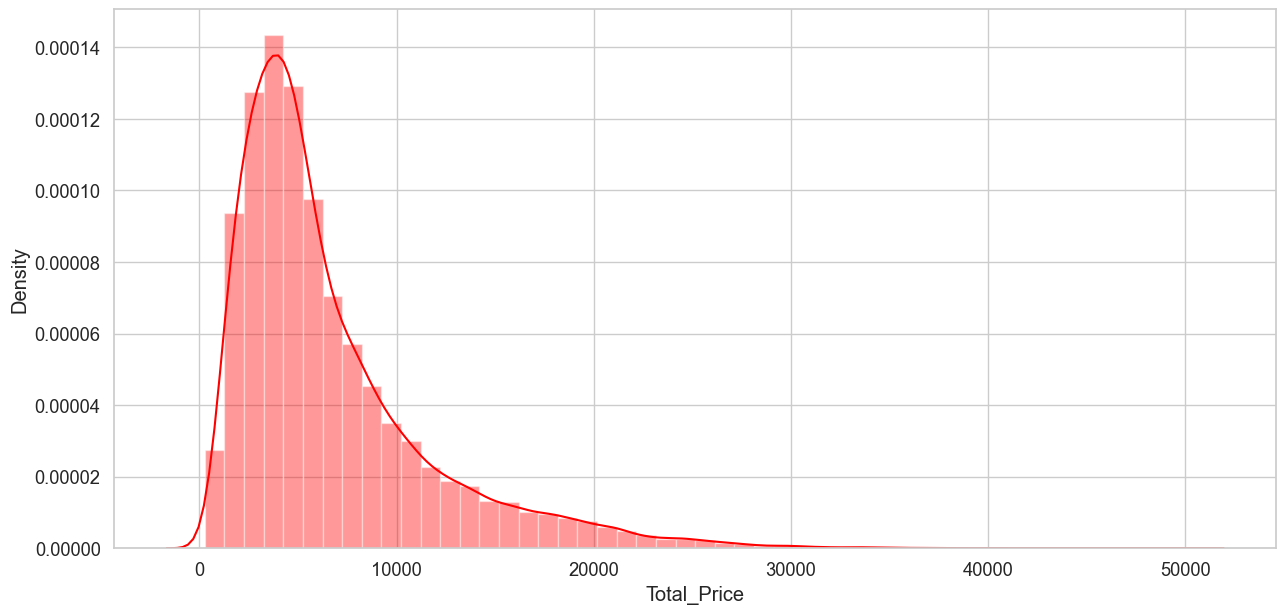

In [74]:
# viewing the distribution of the price column
sns.distplot(All_Data1['Total_Price'],color='red')

In [75]:
counts = All_Data1['Brand'].value_counts()
All_Data1 = All_Data1[~All_Data1['Brand'].isin(counts[counts < 40].index)]
print("Done")

Done


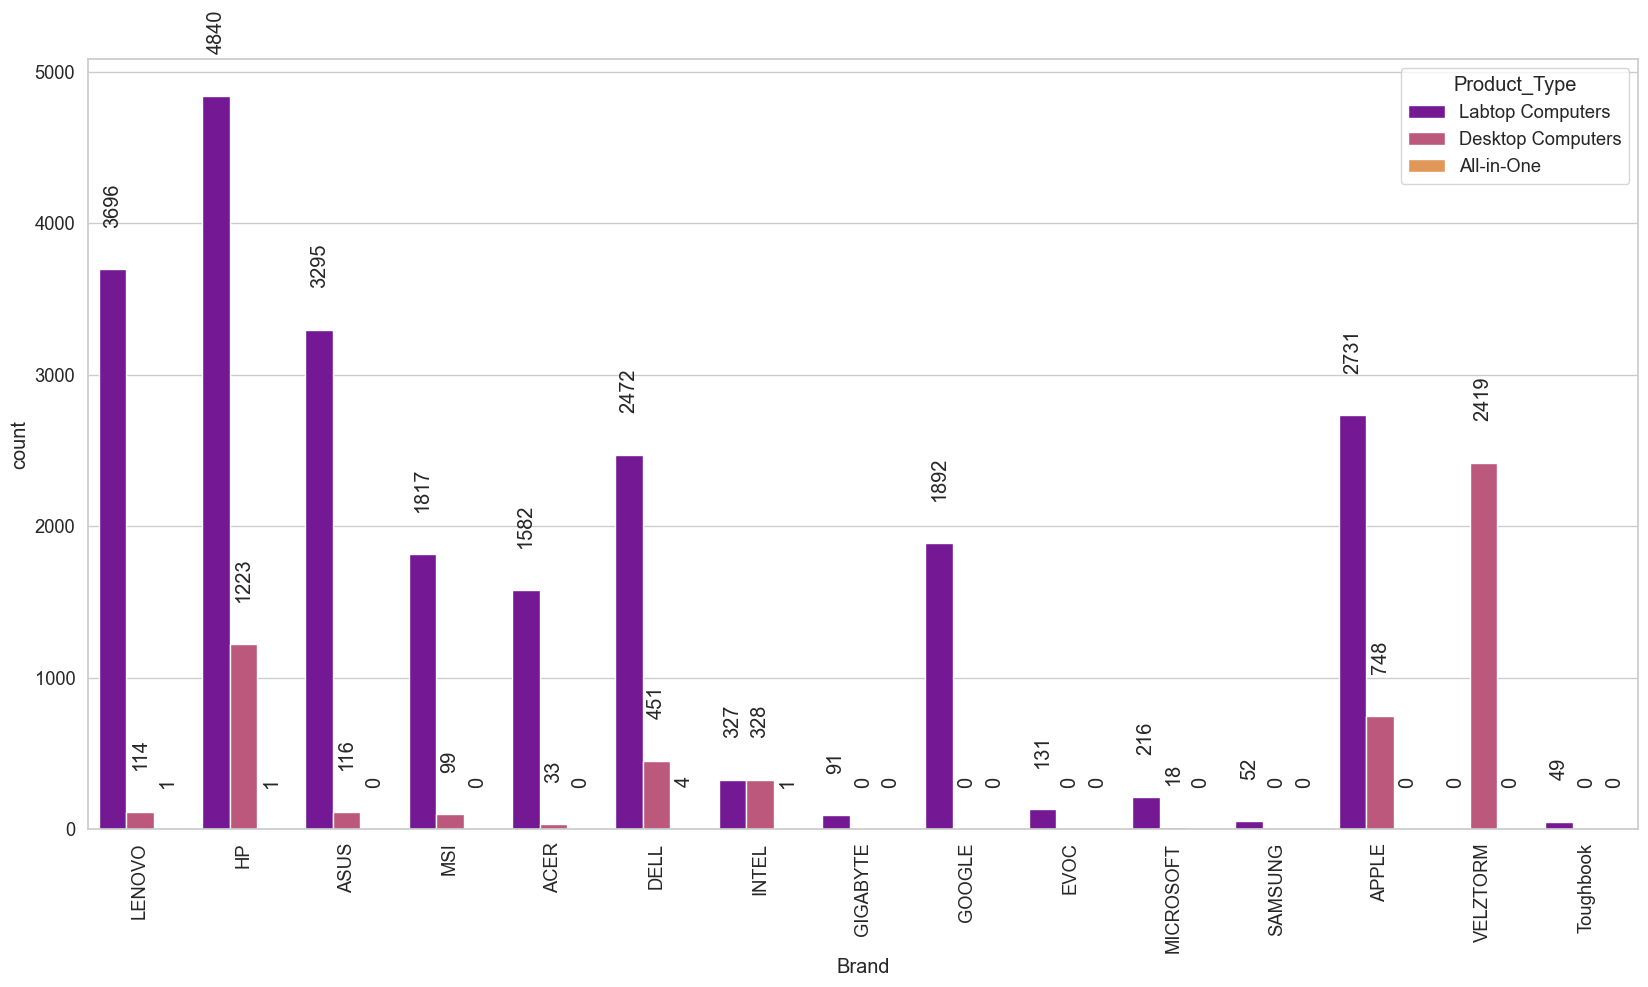

In [76]:
def Columns_hist(df, columns, h):
    for column in columns:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        ax = sns.countplot(x=column, data=df, hue=h, palette='plasma')
        for container in ax.containers:
            ax.bar_label(container, rotation=90, padding=30)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
Columns_hist(All_Data1, ["Brand"], "Product_Type")


<AxesSubplot: xlabel='Screen_Size', ylabel='Total_Price'>

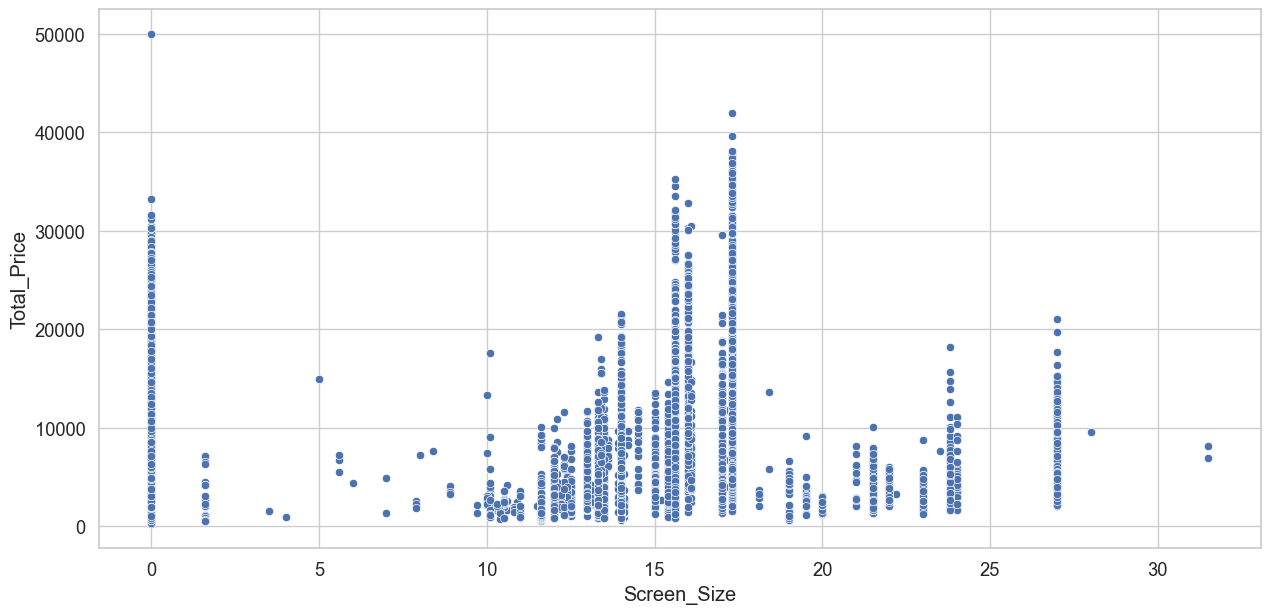

In [77]:
# variation of Screen inches towards the price
All_Data1[All_Data1['Screen_Size'] > 32] = np.nan
sns.scatterplot(x = All_Data1['Screen_Size'],y = All_Data1['Total_Price'])

In [81]:
All_Data1.sample()

Title_Product Brand Model     Series Color  Date_First_Year      Product_Type Product_Style Product_Usage    Weight CPU_Brand CPU_Model CPU_Series CPU_Gen  Cores  CPU_Speed   Core_Name GPU_Brand GPU_Model  Video_Memory Is_SSD  Storage_HDD  Storage_SSD SSD_Type  Memory_capacity Memory_Type  Memory_Speed OS_Corporation        OS_Version  Screen_Size   X_res  Y_res Res_Type Touchscreen WideScreen Screen_Tec WebCam  AC_Power  Battery_Cell  Power_Supply_W Bluetooth  Bluetooth_V Ethernet WiFi_Ver Has_Thunderbolt  Type_C_Count  Type_A_Count  USB_C_Ver  Product_Price_US  Product_Price_SR  Shipping_Price  Total_Price          Product_URL       Product_Images    PPI
2392  HP 15t-dw300 Lap...    HP     3  15t-dw300  Gold           2022.0  Labtop Computers          Mini      Business  2.676195     Intel      Core         i5    11th    4.0        2.4  Tiger Lake     Intel  Graphics           4.0   True          0.0        512.0      NaN             32.0        DDR4           NaN      Microsoft  Windows Home Pro         15.6  1366.0  768.0      FHD        True       True        IPS    Yes      45.0           3.0             NaN      True          5.0    False   Wifi 6            True           1.0           1.0  USB C 3.2        1236.63913           5688.54          141.76       5830.3  https://www.newe...  ['https://c1.new...  100.0

<AxesSubplot: xlabel='Total_Price', ylabel='Density'>

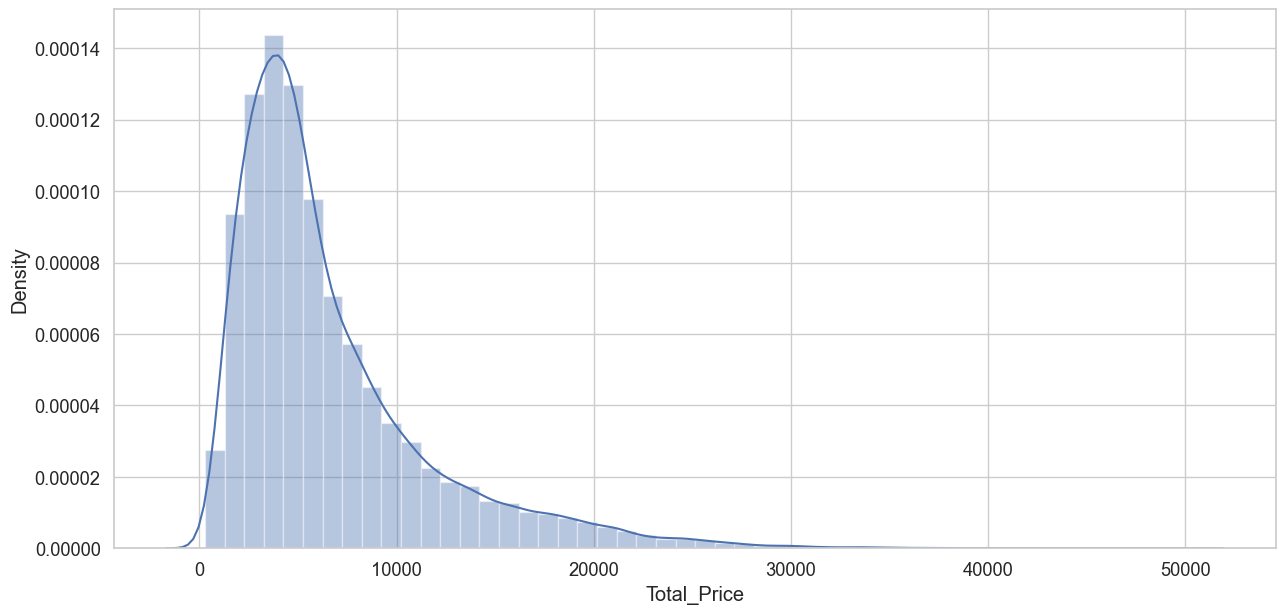

In [97]:
sns.distplot(All_Data1["Total_Price"])

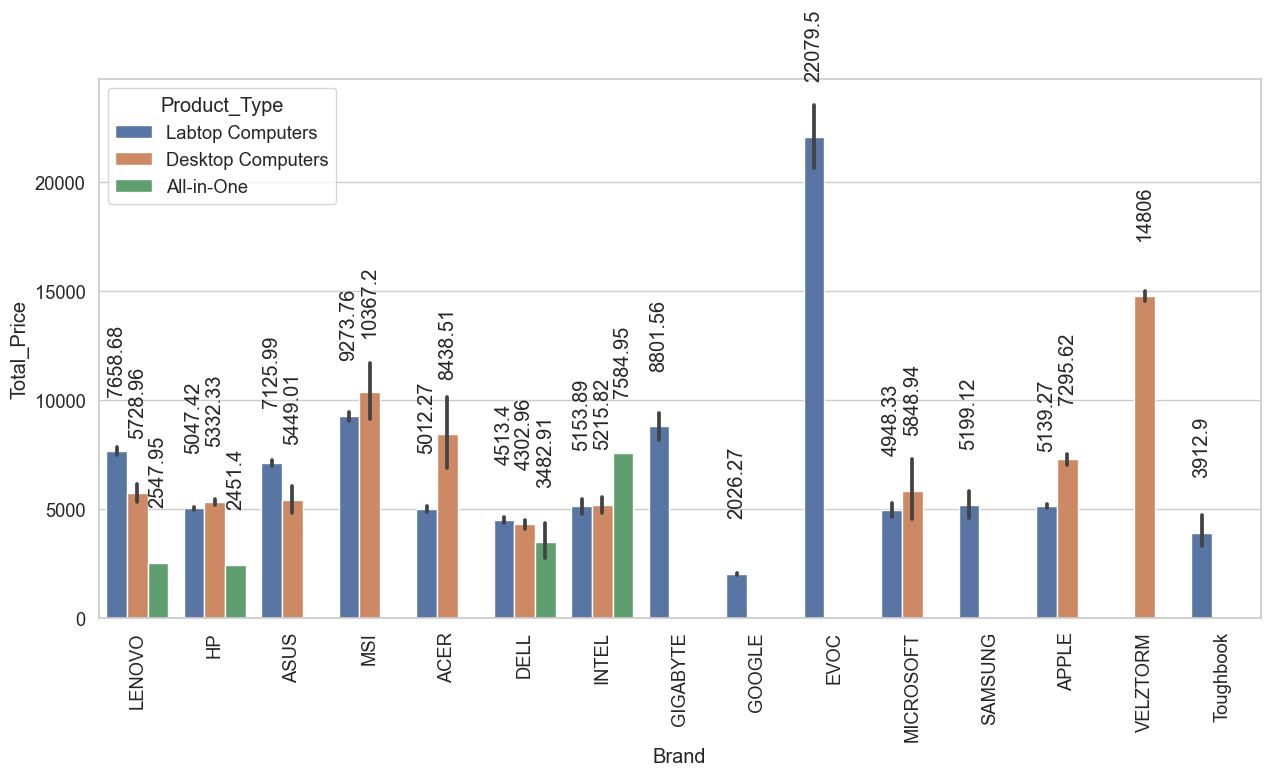

In [102]:
ax = sns.barplot(data=All_Data1,x='Brand',y='Total_Price', hue="Product_Type")
for container in ax.containers:
    ax.bar_label(container, rotation=90, padding=40)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

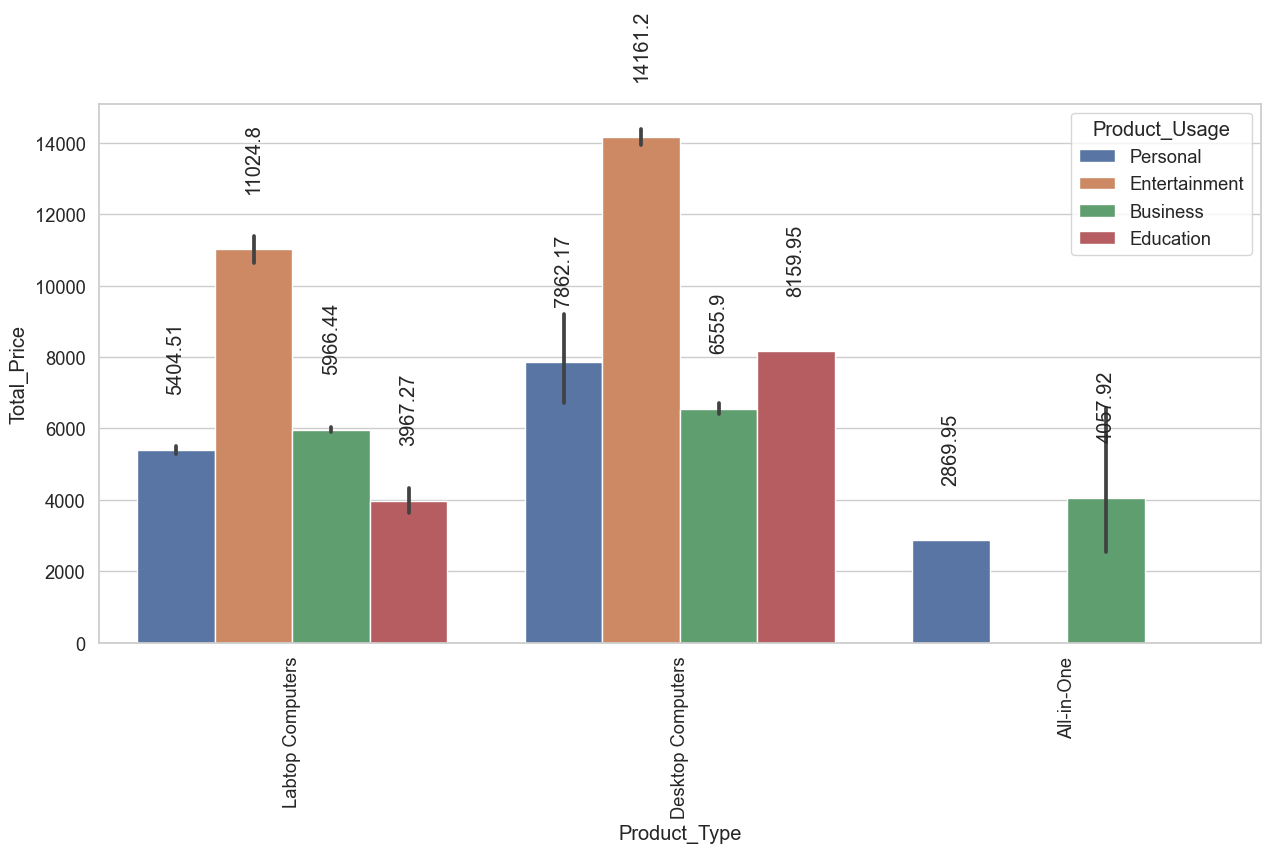

In [105]:
ax = sns.barplot(data=All_Data1,x='Product_Type',y='Total_Price', hue="Product_Usage")
for container in ax.containers:
    ax.bar_label(container, rotation=90, padding=40)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<AxesSubplot: ylabel='Density'>

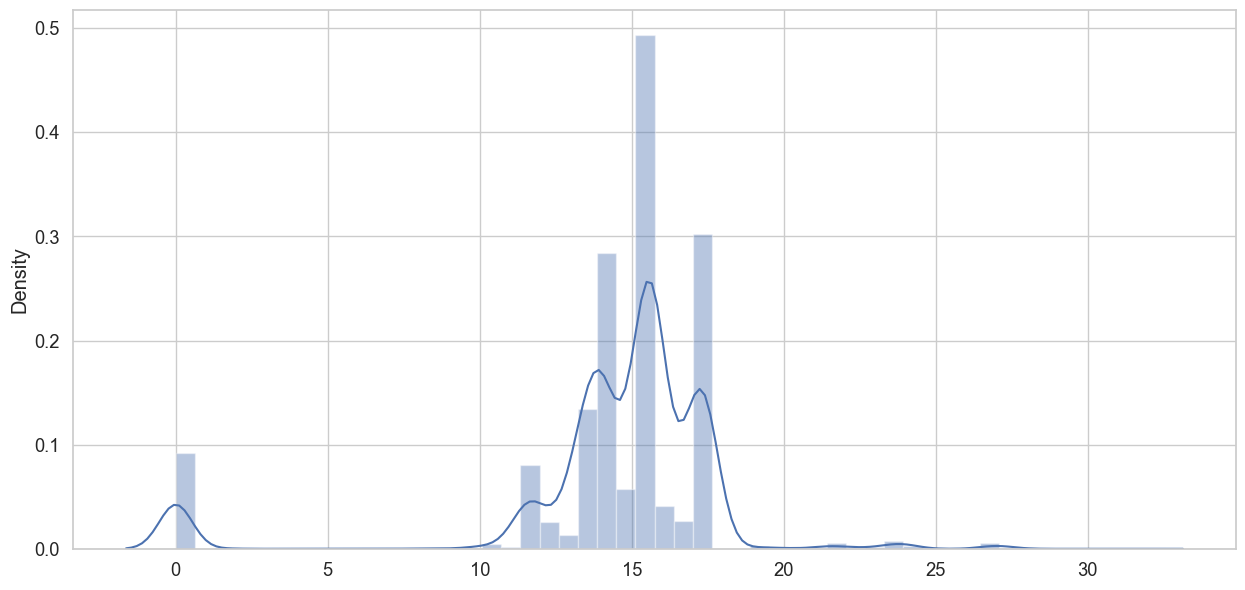

In [110]:
sns.distplot(x=All_Data1[All_Data1["Product_Type"] == "Labtop Computers"]["Screen_Size"])


<AxesSubplot: xlabel='Screen_Size', ylabel='Total_Price'>

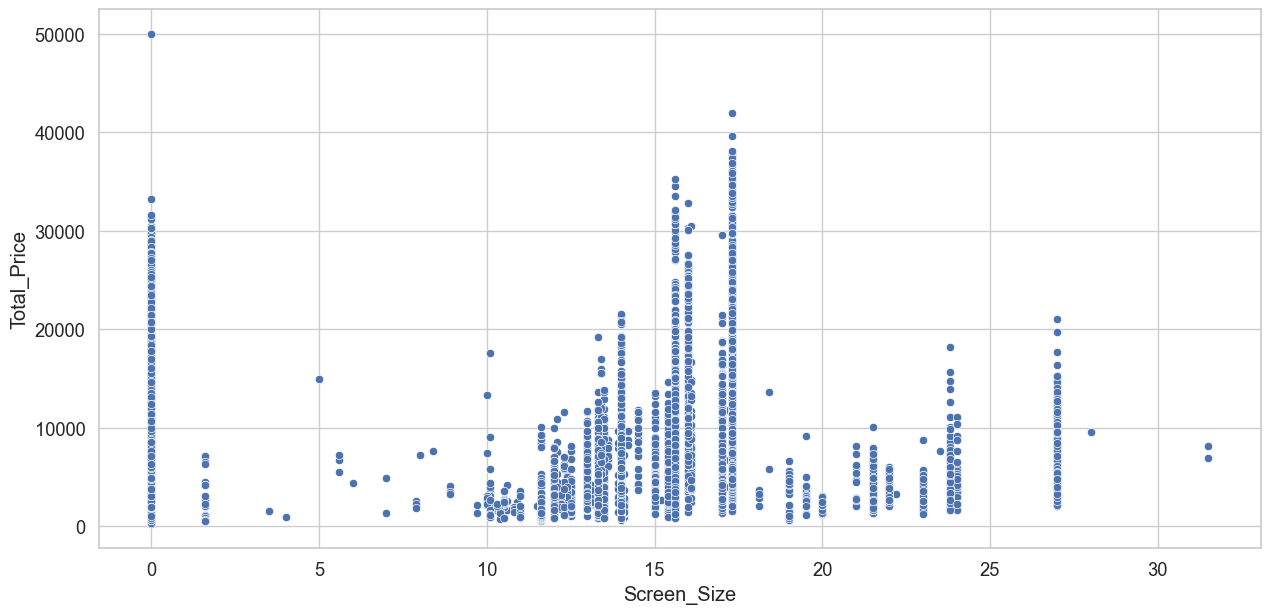

In [114]:
sns.scatterplot(x="Screen_Size",y="Total_Price",data=All_Data1)

**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**
**So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

In [78]:
All_Data1['PPI'] = round(((All_Data1['X_res']**2+All_Data1['Y_res']**2))** 0.5/All_Data1['Screen_Size']).astype('float')
All_Data1[['PPI','X_res','Y_res']].sample(2)

PPI   X_res   Y_res
7996     NaN     0.0     0.0
22184  141.0  1920.0  1080.0

In [79]:
All_Data1['PPI'] = All_Data1['PPI'].apply(lambda x: np.nan if x == "inf" else x)

In [ ]:
Labtop = All_Data1.loc[All_Data1['Product_Type'] == "Labtop Computers"]
Desktop = All_Data1.loc[All_Data1['Product_Type'] == "Desktop Computers"]

In [ ]:
Labtop.sample(1)

Title_Product   Brand Model       Series  Color  Date_First_Year      Product_Type Product_Style Product_Usage    Weight CPU_Brand CPU_Model CPU_Series CPU_Gen  Cores  CPU_Speed Core_Name GPU_Brand GPU_Model  Video_Memory Is_SSD  Storage_HDD  Storage_SSD SSD_Type  Memory_capacity Memory_Type  Memory_Speed OS_Corporation      OS_Version  Screen_Size  X_res  Y_res   Res_Type Touchscreen WideScreen Screen_Tec     WebCam  AC_Power  Battery_Cell  Power_Supply_W Bluetooth  Bluetooth_V Ethernet WiFi_Ver Has_Thunderbolt  Type_C_Count  Type_A_Count  USB_C_Ver  Product_Price_US  Product_Price_SR  Shipping_Price  Total_Price          Product_URL       Product_Images  PPI
8125  Lenovo ThinkStat...  LENOVO  M80s  ThinkCentre  Black           2022.0  Labtop Computers          Thin      Business  5.307031     Intel      Core         i7    10th    NaN        2.9       NaN     Intel  Graphics           5.0   True          0.0       1024.0     NVMe             64.0        DDR4        2400.0      Microsoft  Windows 11 Pro          0.0    0.0    0.0  No Screen       False      False  No Screen  No WebCam       NaN           0.0           180.0      True          5.0     True   Wifi 6           False           5.0           9.0  USB C 3.2        928.519565           4271.19          497.51       4768.7  https://www.newe...  ['https://c1.new...  NaN

### Univariate analysis

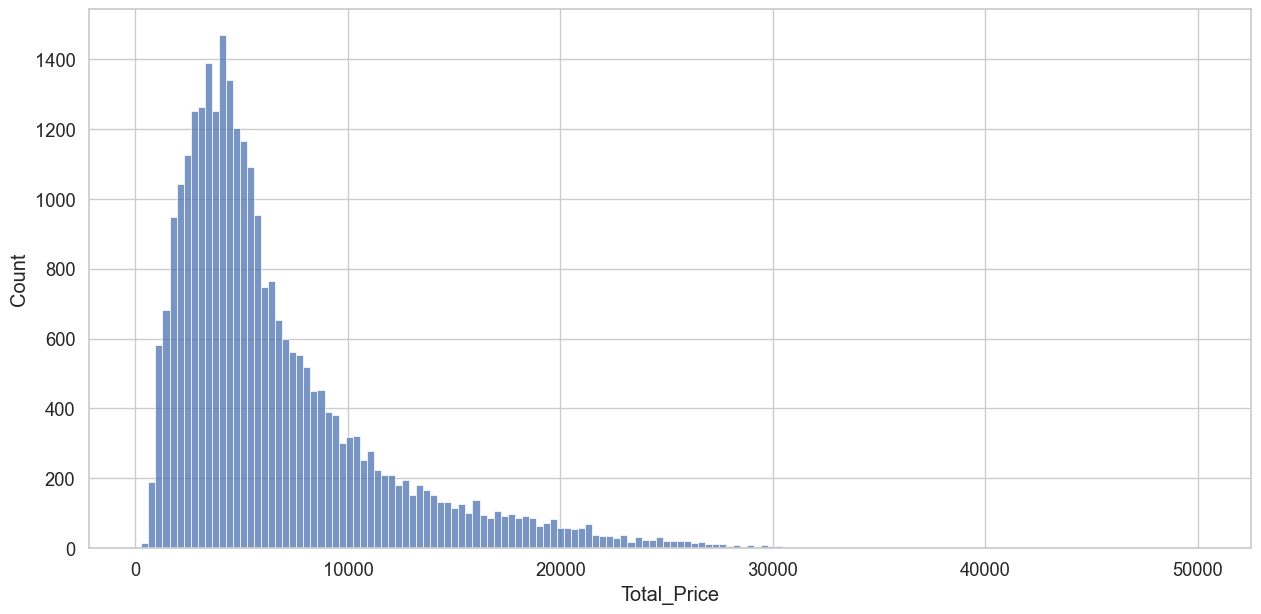

In [117]:
sns.histplot(x='Total_Price', data=All_Data1);

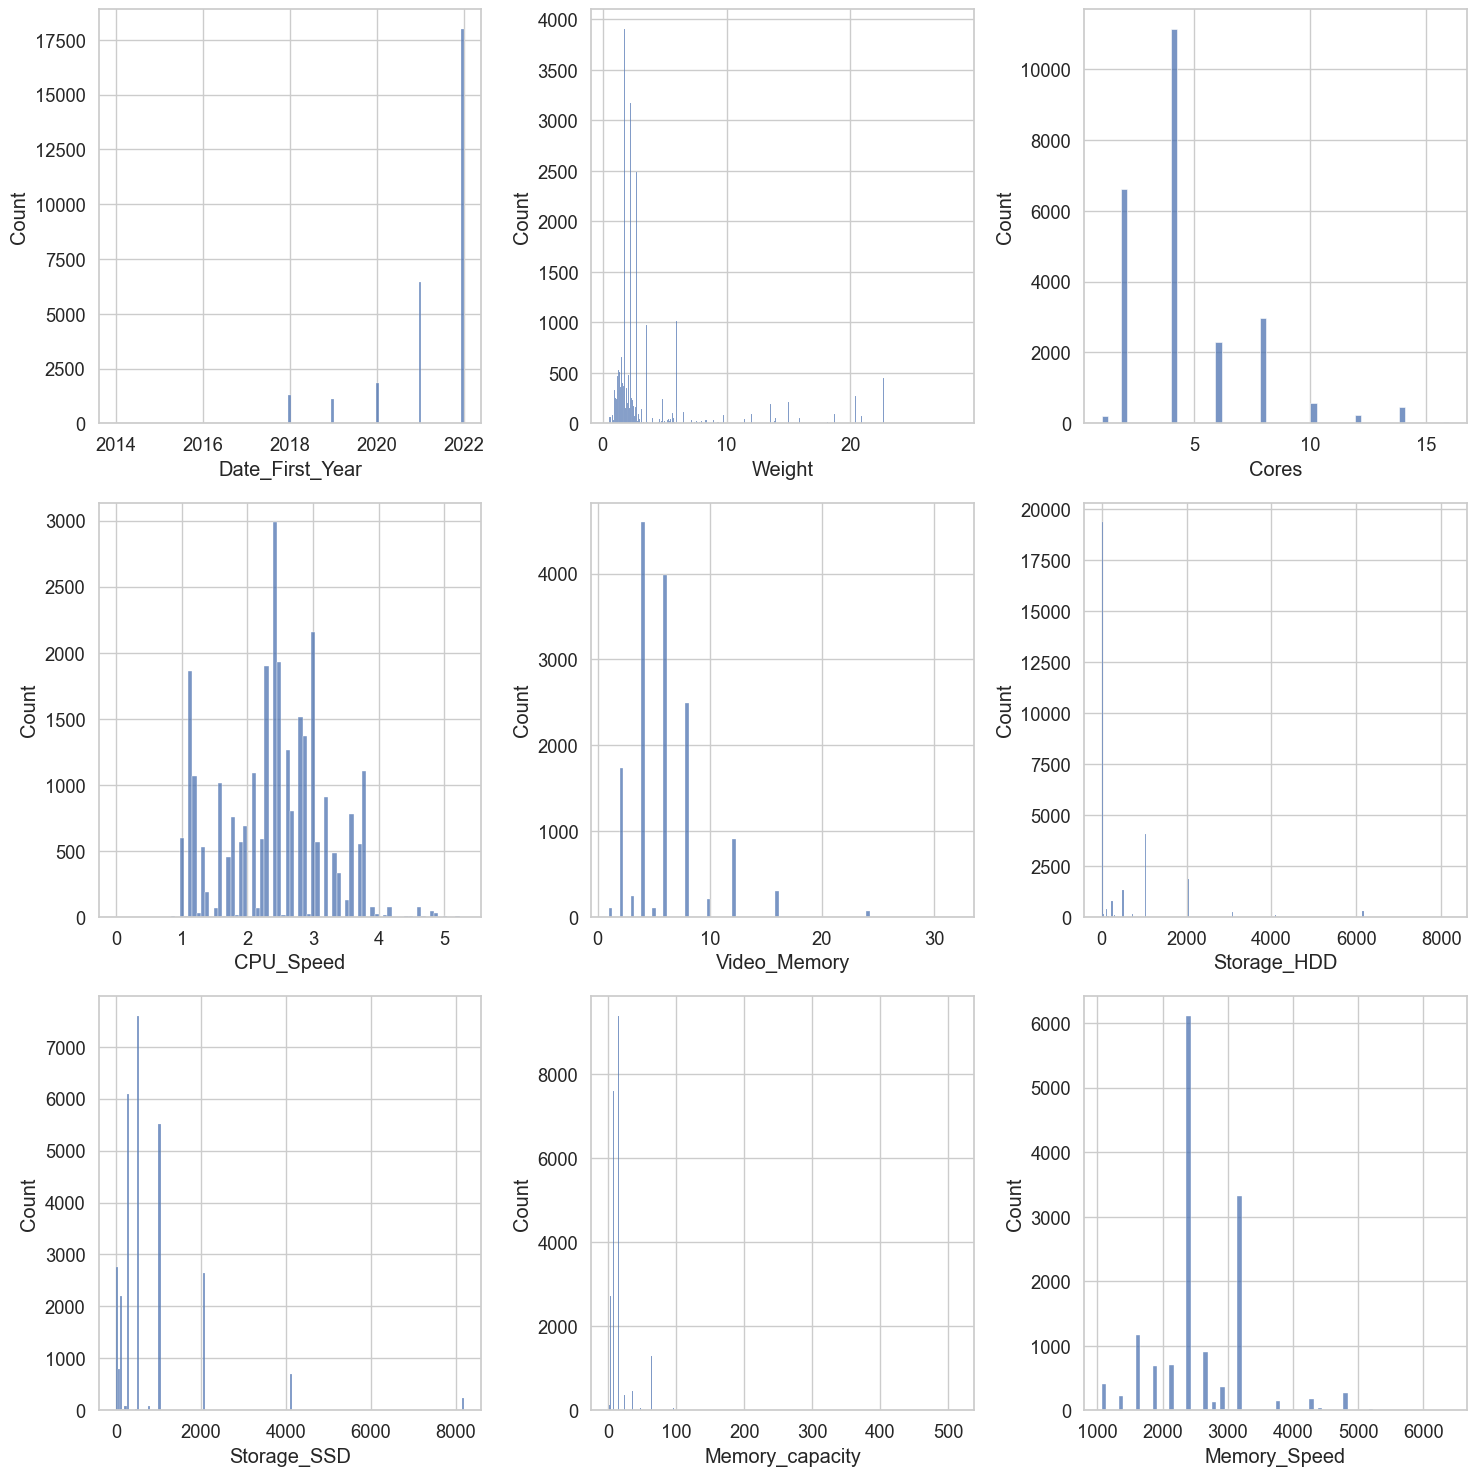

In [119]:
cols = 3
rows = 3
num_cols = All_Data1.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    try:
        ax=fig.add_subplot(rows,cols,i+1)
        sns.histplot(x = All_Data1[col], ax = ax)
    except:
        pass
    
fig.tight_layout()  
plt.show()

<AxesSubplot: xlabel='Total_Price', ylabel='Density'>

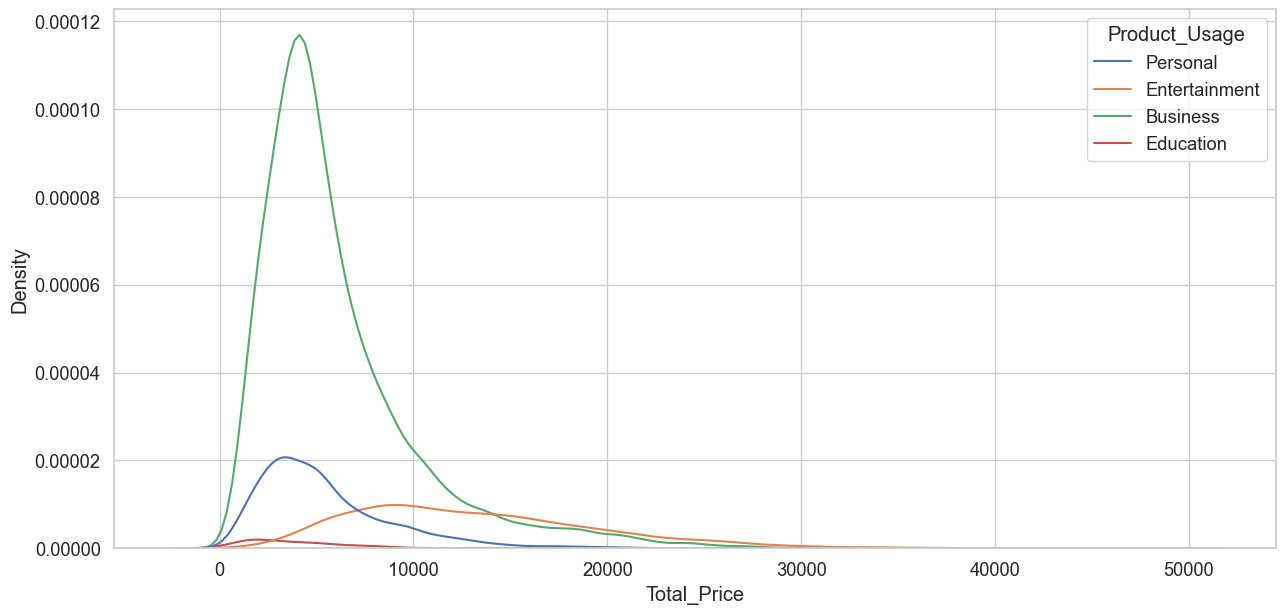

In [121]:
sns.kdeplot(x='Total_Price', data=All_Data1, hue='Product_Usage')

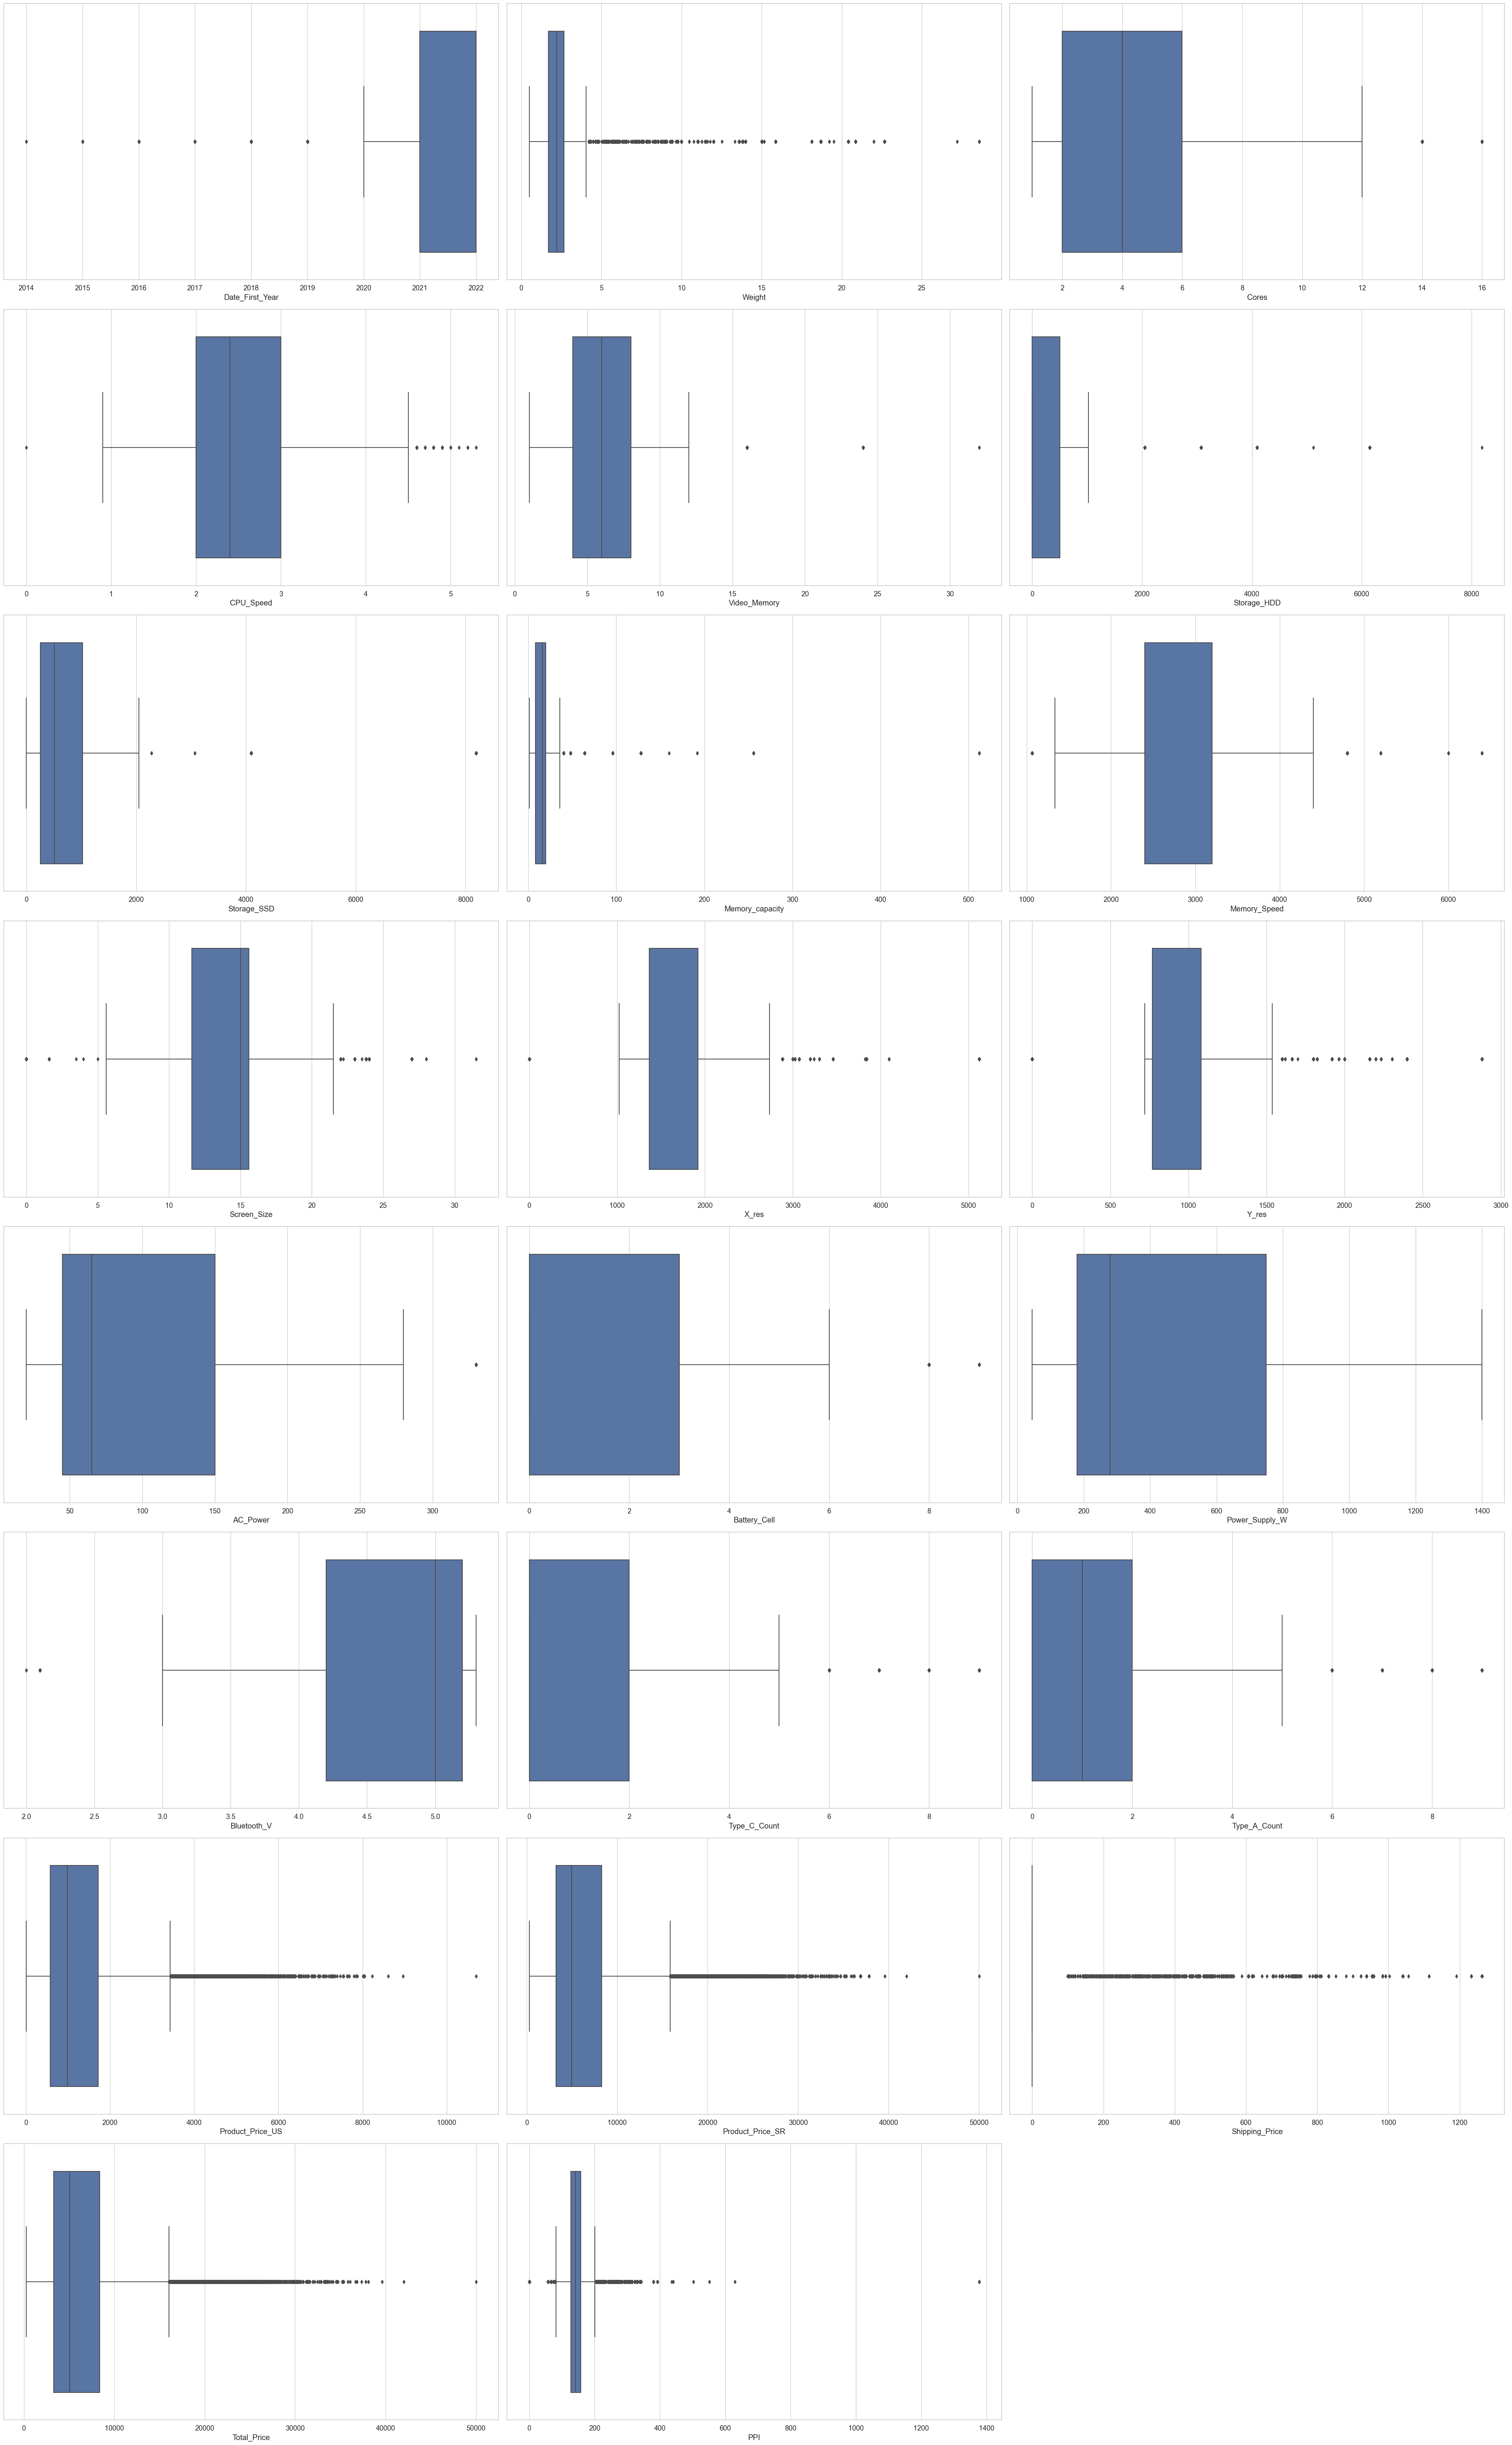

In [152]:
cols = 3
rows = 10
num_cols = All_Data1.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (40,80))
for i, col in enumerate(num_cols):
        ax=fig.add_subplot( rows, cols, i+1)
        
        sns.boxplot(x=All_Data1[col], ax=ax)

        
fig.tight_layout() 
plt.savefig('boxplot_EDA.png') 

plt.show()


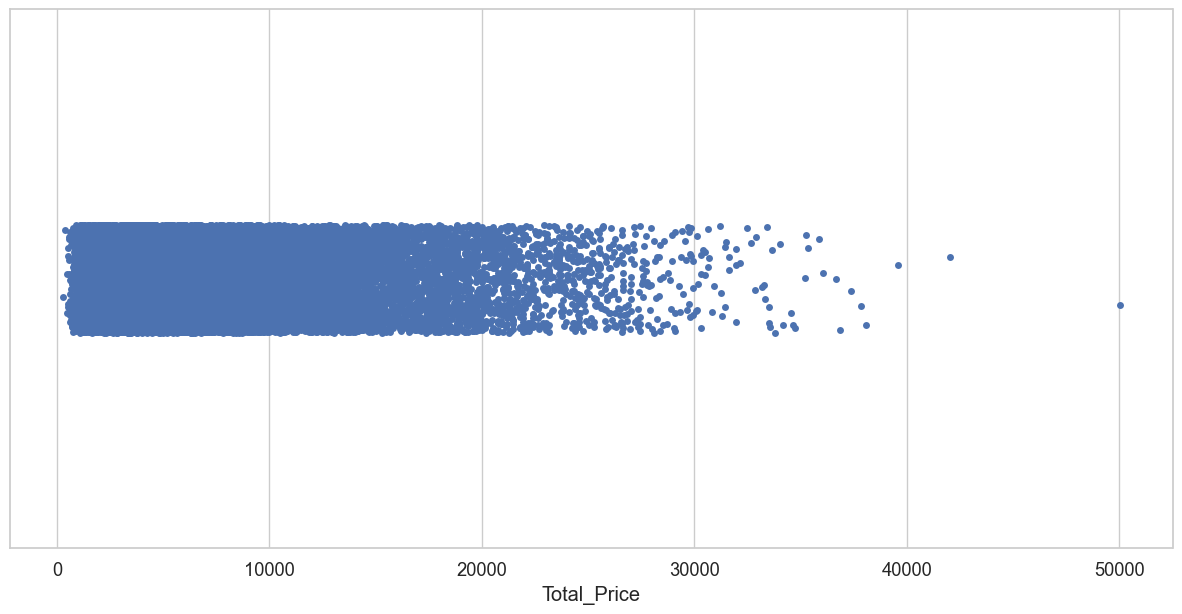

In [130]:
sns.stripplot(x=All_Data1["Total_Price"]);

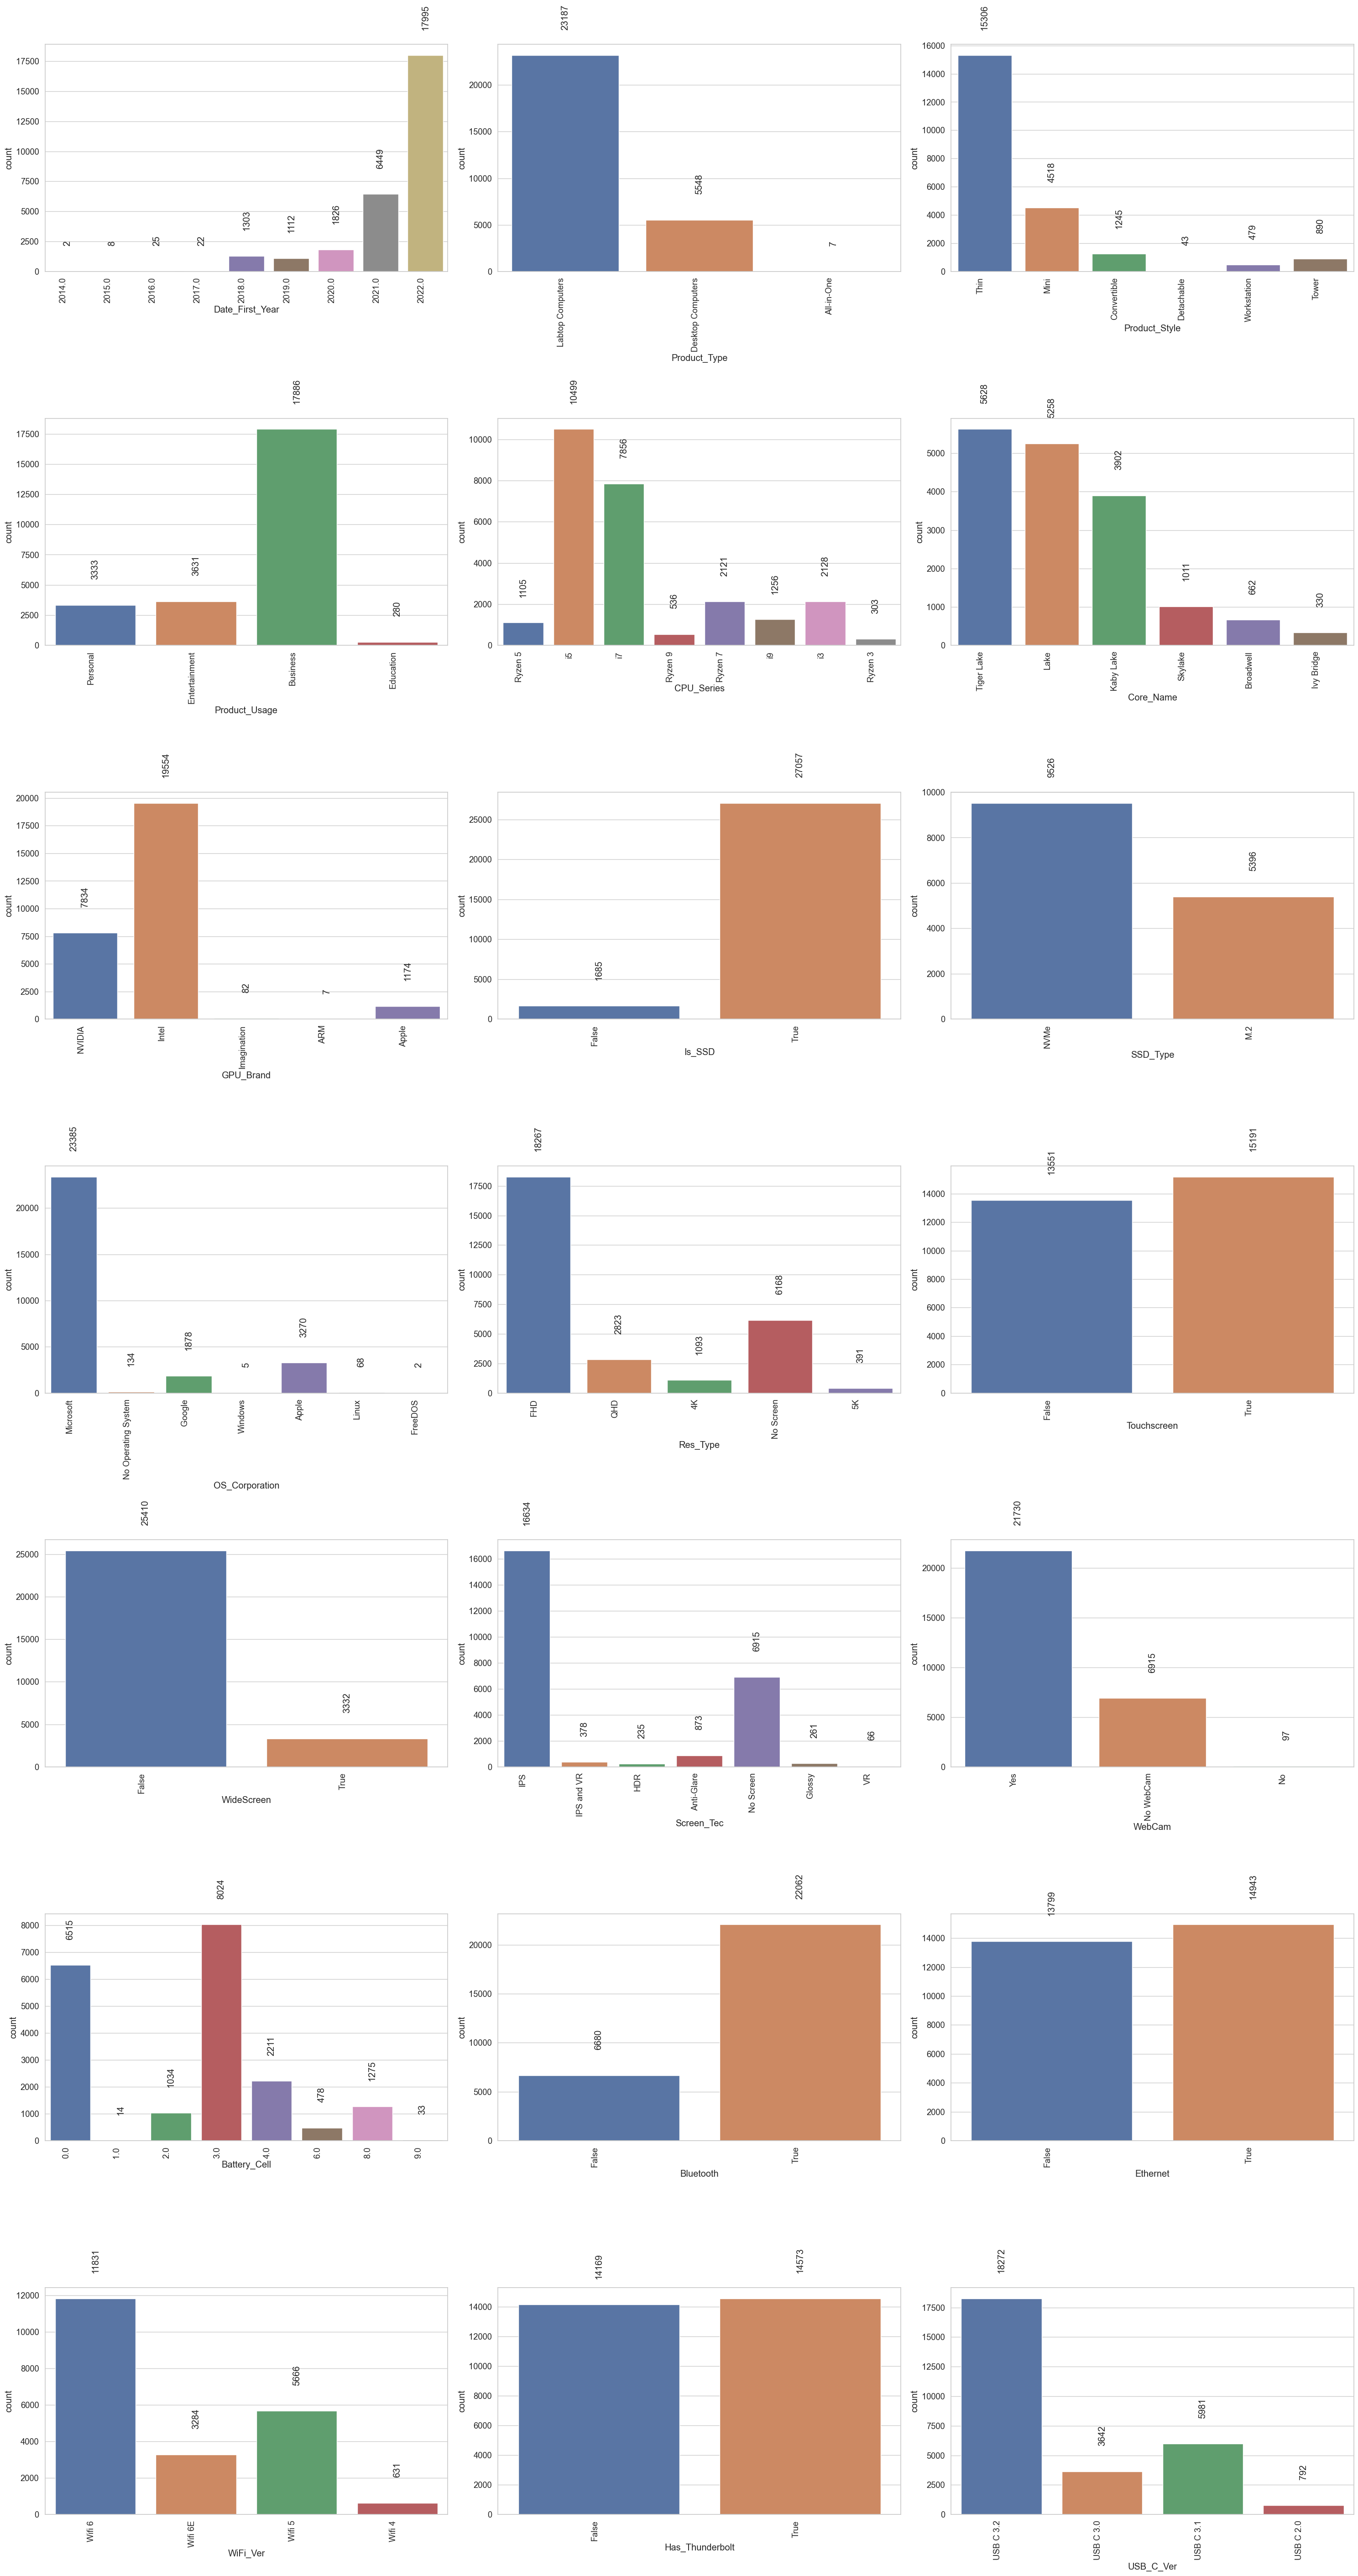

In [147]:
cols = 3
rows = 10
fig = plt.figure(figsize= (30,80))
all_cats = All_Data1.select_dtypes(include='object')
cat_cols = All_Data1.columns[All_Data1.nunique() < 10]
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=All_Data1[col], ax=ax)
    for container in ax.containers:
        ax.bar_label(container, rotation=90, padding=40)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    plt.xticks(rotation=90, ha='right')
fig.tight_layout()  
plt.savefig('Cat_EDA.png')
plt.show()


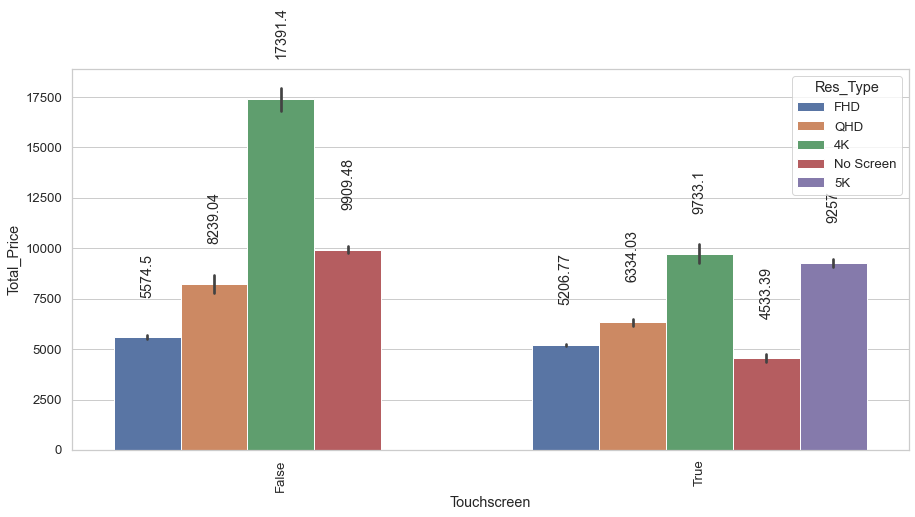

In [ ]:
ax = sns.barplot(All_Data1['Touchscreen'],
                 All_Data1['Total_Price'], hue=All_Data1["Res_Type"])
for container in ax.containers:
    ax.bar_label(container, rotation=90, padding=40)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

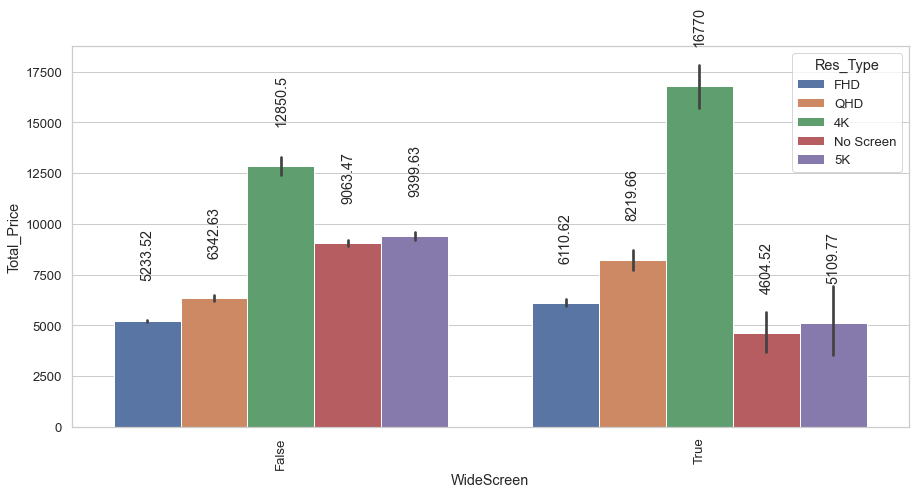

In [ ]:
ax = sns.barplot(All_Data1['WideScreen'],
                 All_Data1['Total_Price'], hue=All_Data1["Res_Type"])
for container in ax.containers:
    ax.bar_label(container, rotation=90, padding=40)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

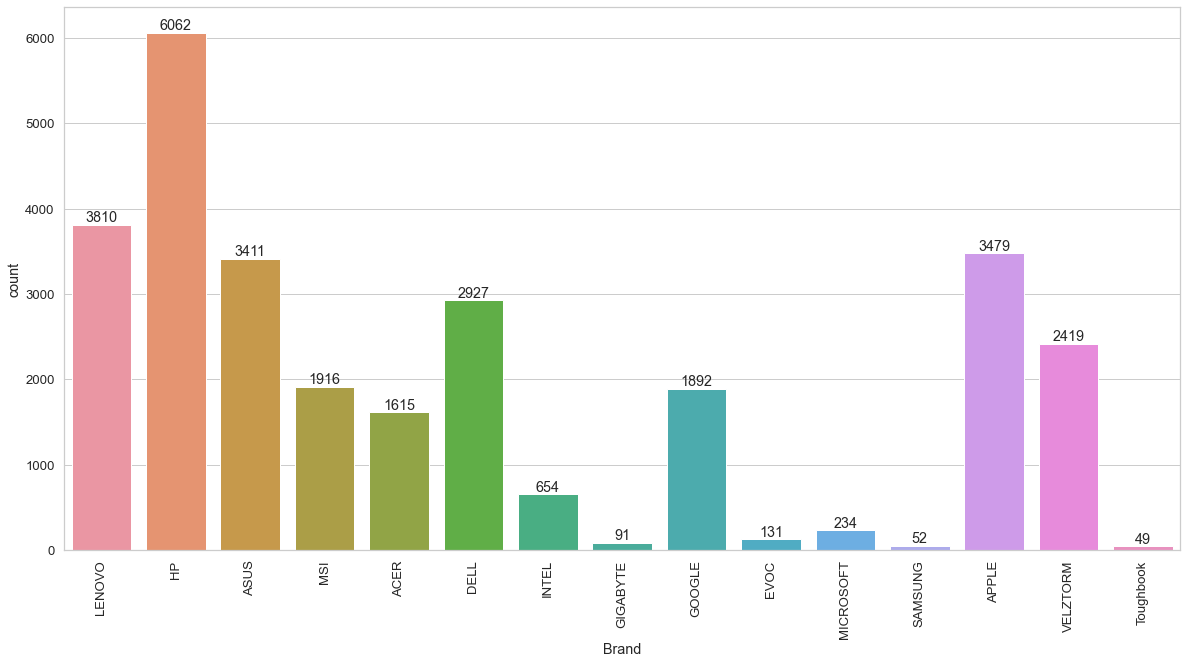

In [ ]:
# Count PLot
def Columns_hist(df,columns):
    for column in columns:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        ax = sns.countplot(x=column, data=df)
        for container in ax.containers:
            ax.bar_label(container)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
Columns_hist(All_Data1, ["Brand"])


## CPU

In [ ]:
# CPU_Brand , CPU_Model , CPU_Series , CPU_Gen , Cores , CPU_Speed , CPU_Version , L3_Cache , Smart_Cache , Core_Name , Threads


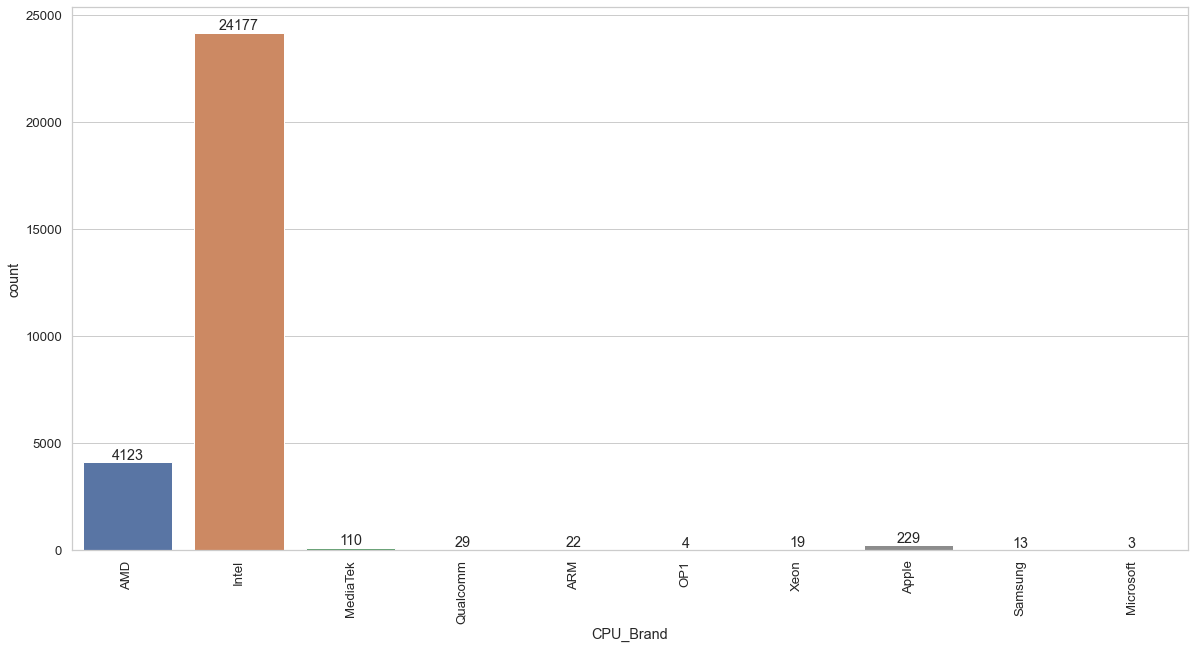

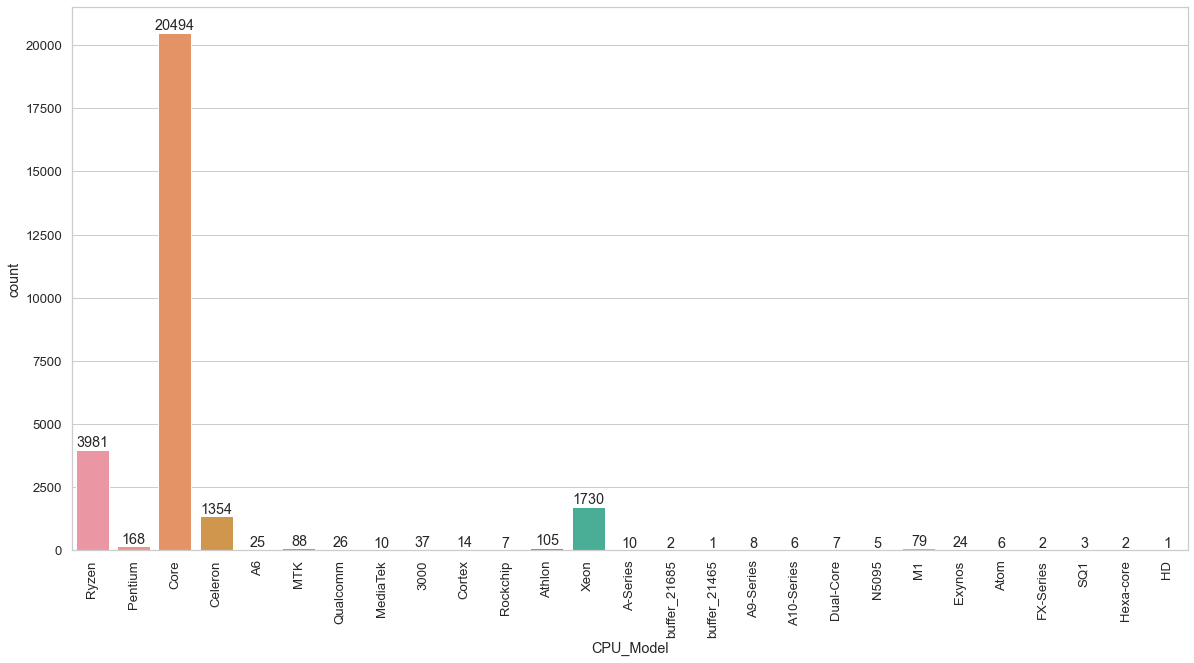

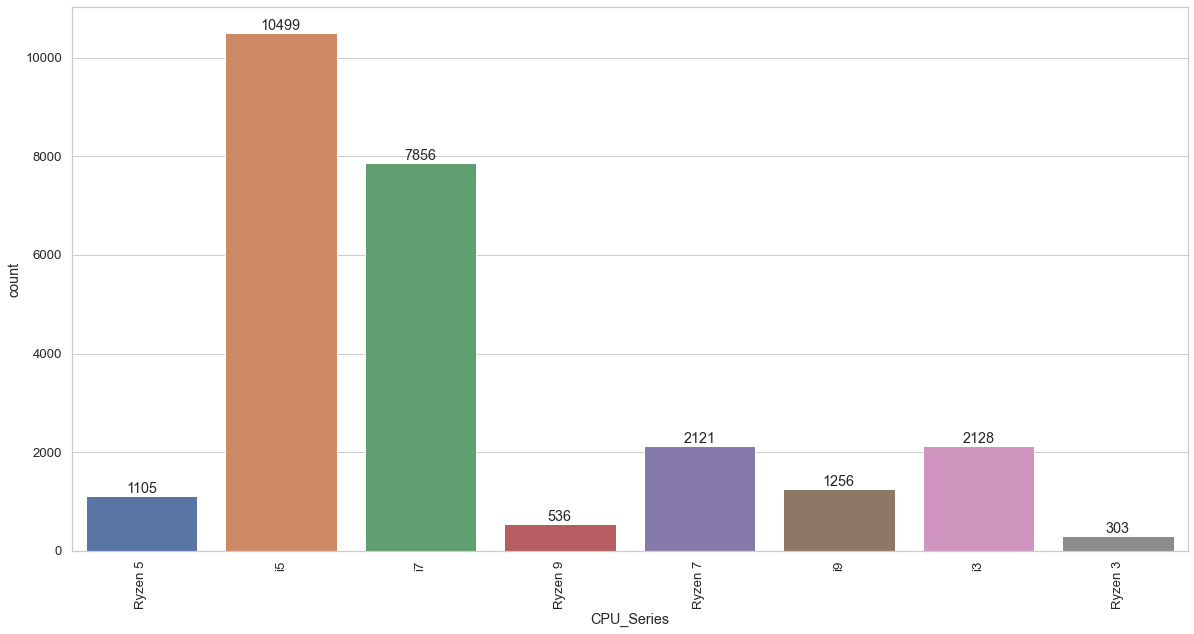

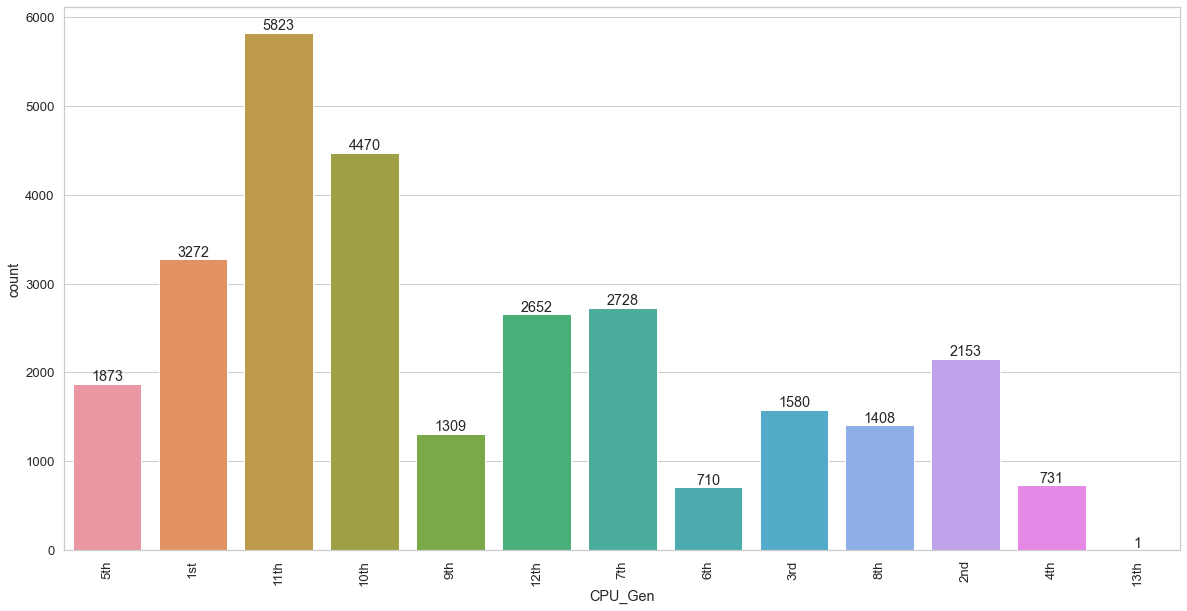

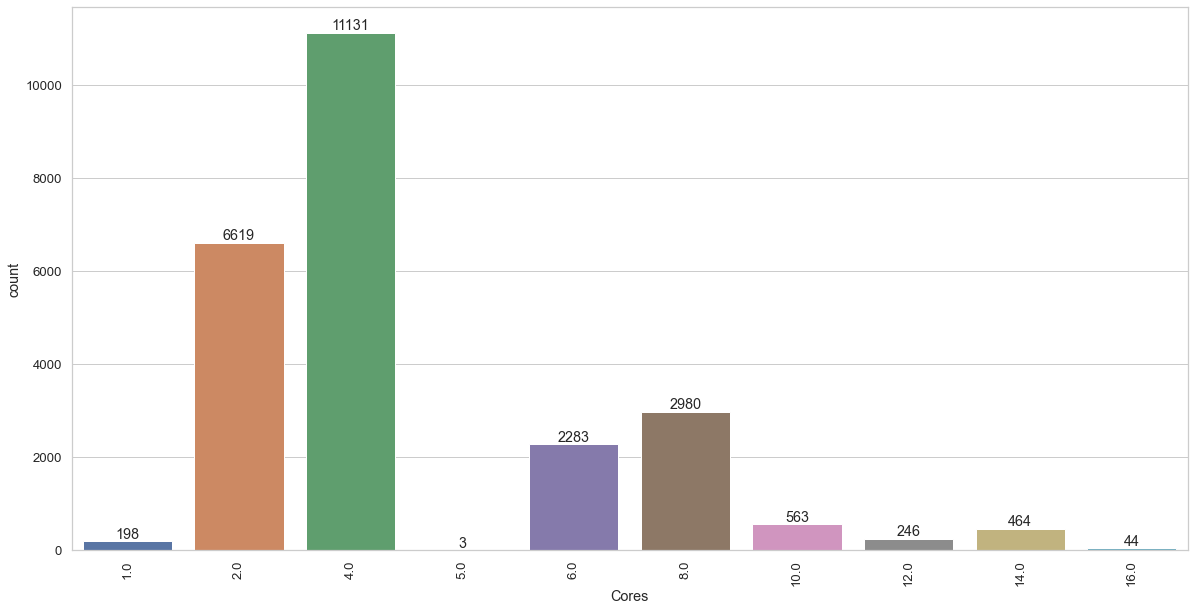

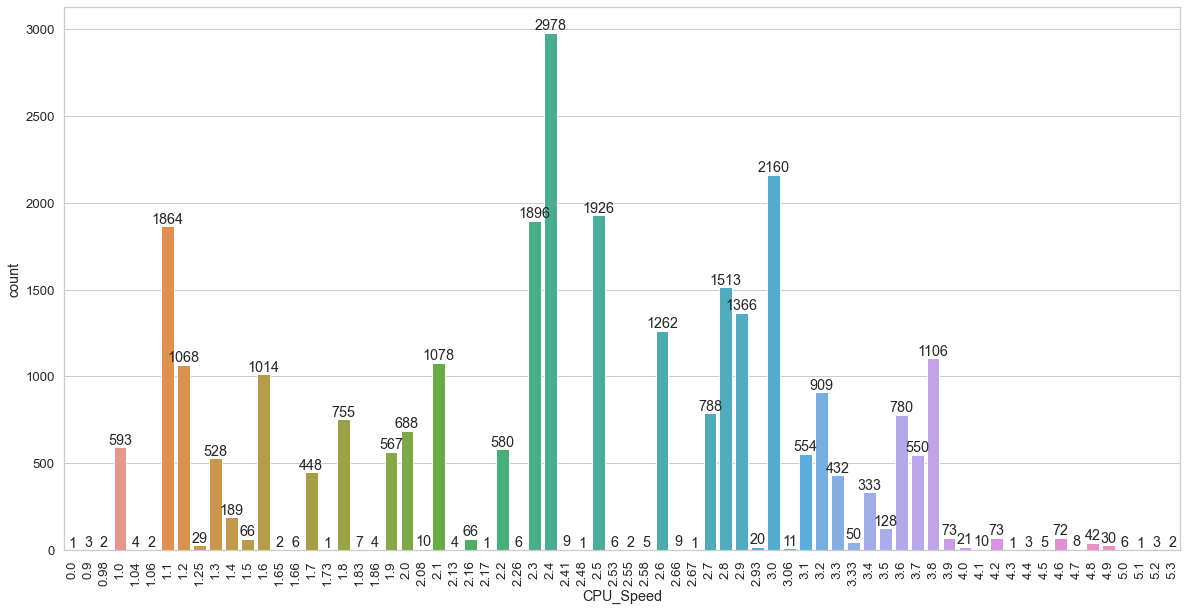

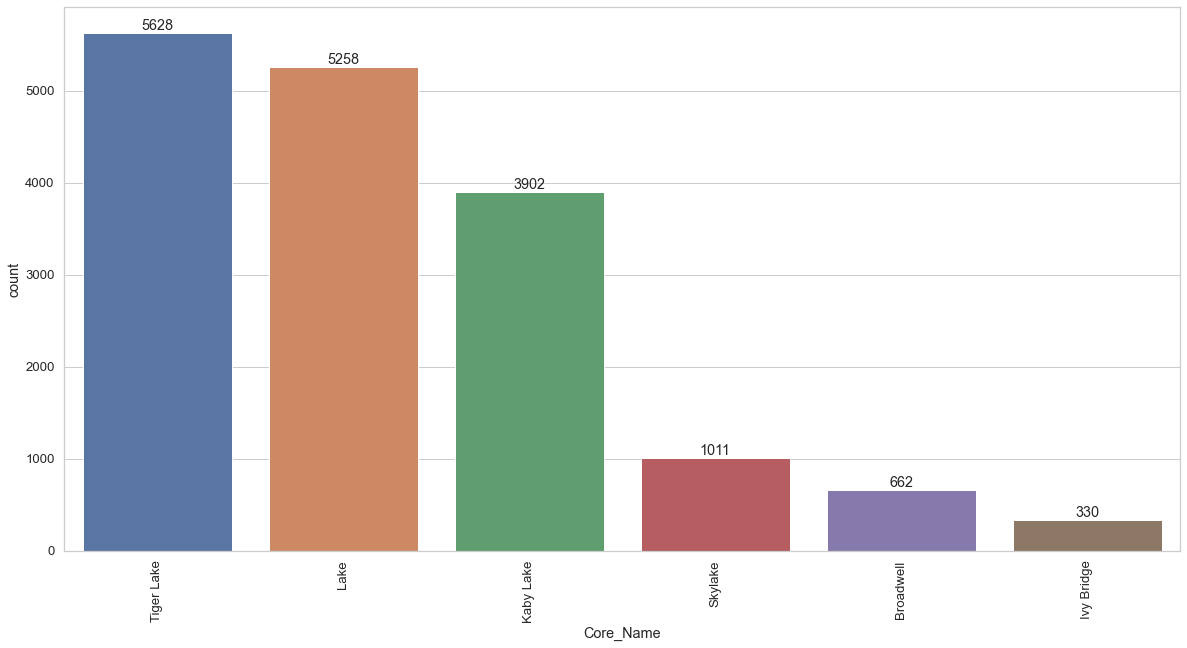

In [ ]:
# Count PLot
cpu = ["CPU_Brand" , "CPU_Model" , "CPU_Series" , "CPU_Gen" , "Cores" , "CPU_Speed"  , "Core_Name" ]
def Columns_hist(df, columns):
    for column in columns:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        ax = sns.countplot(x=column, data=df)
        for container in ax.containers:
            ax.bar_label(container)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
Columns_hist(All_Data1, cpu)


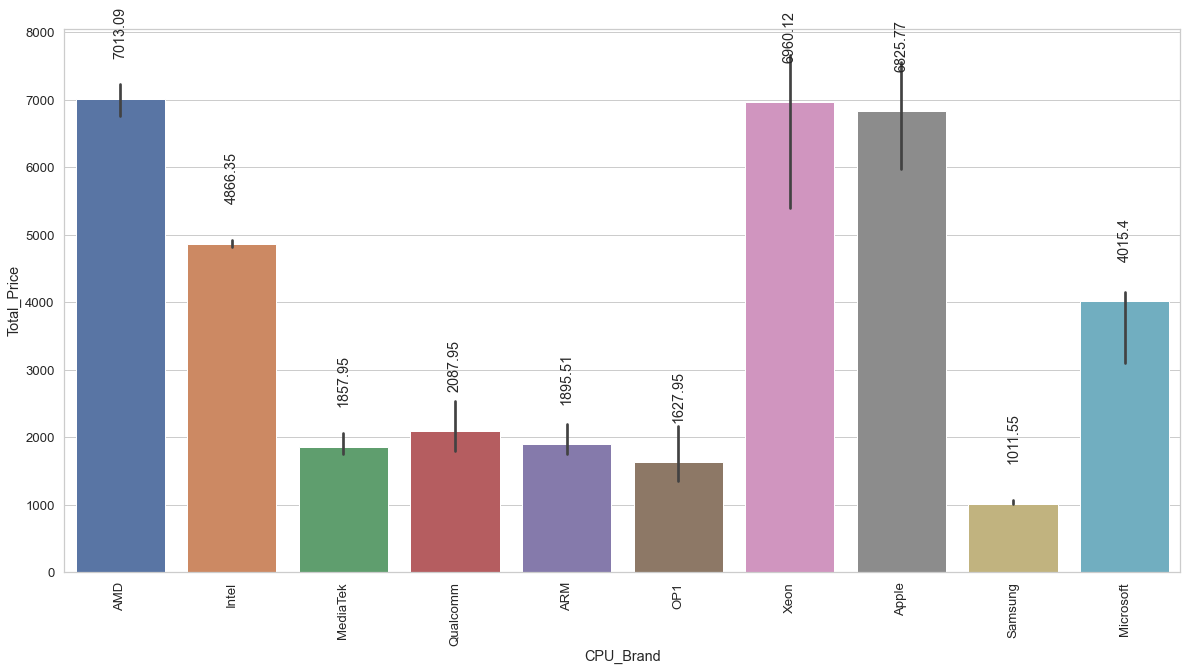

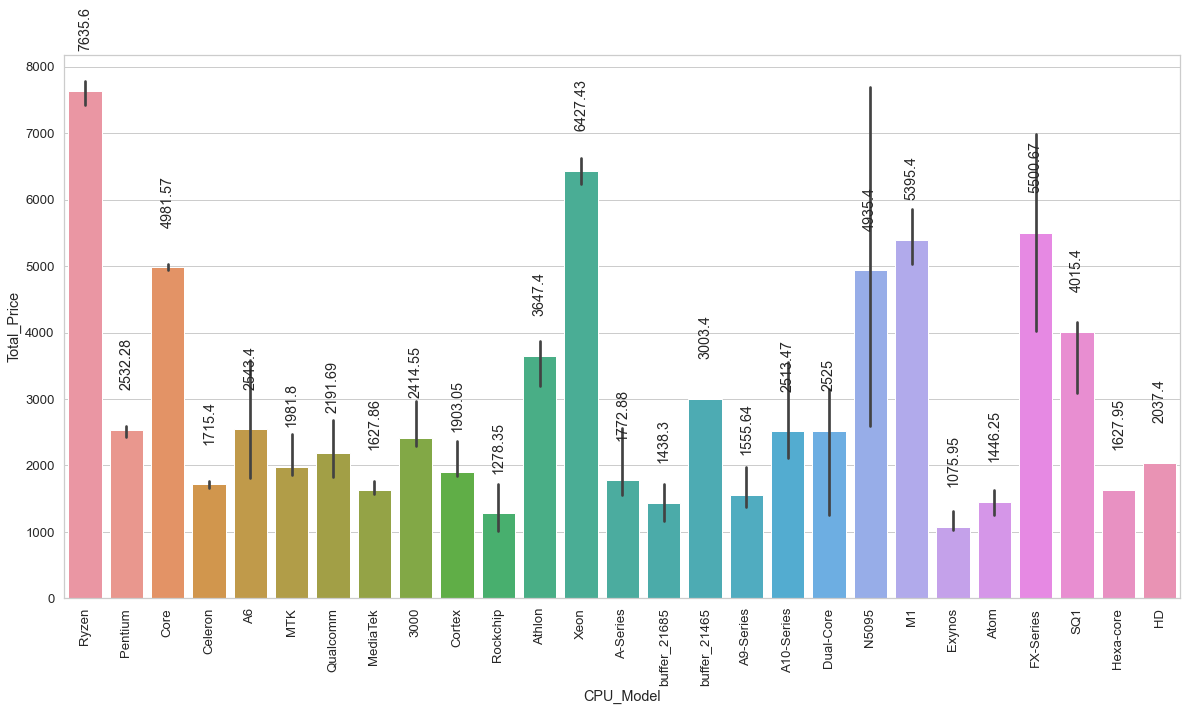

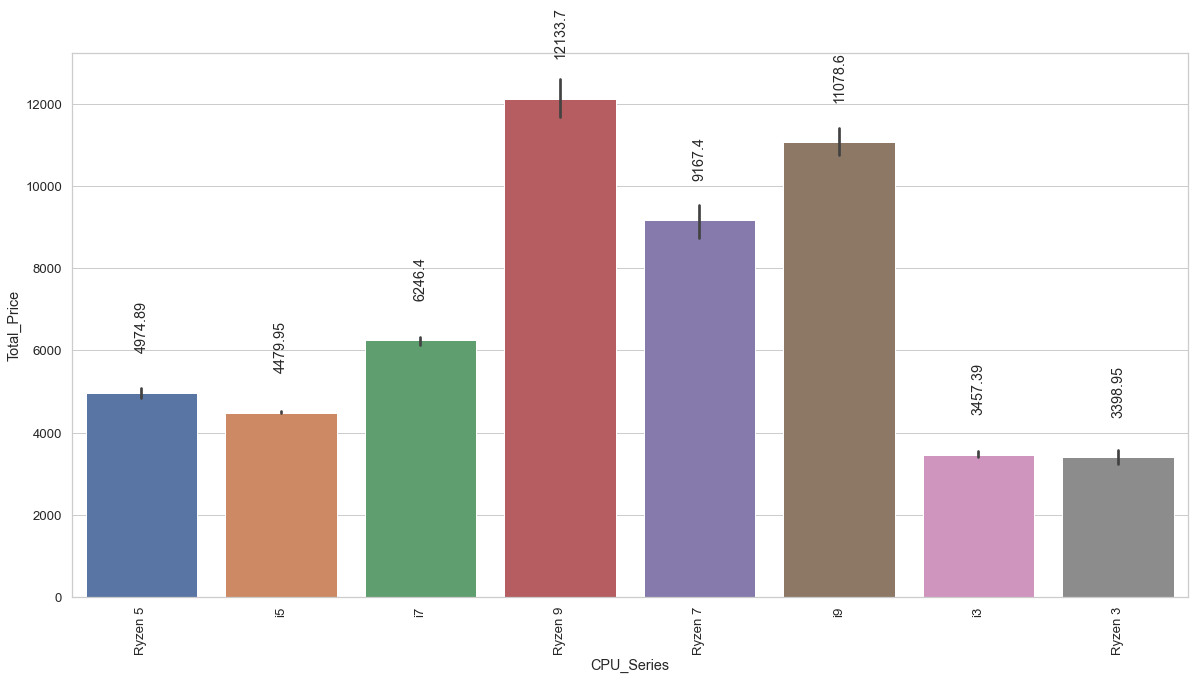

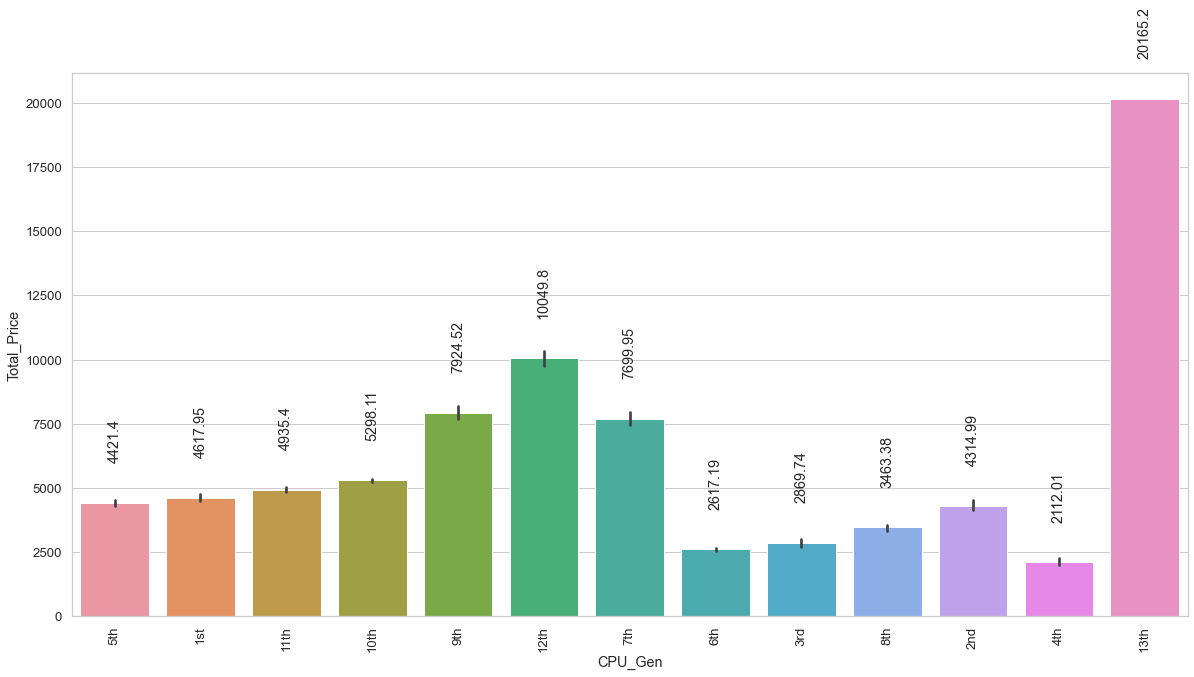

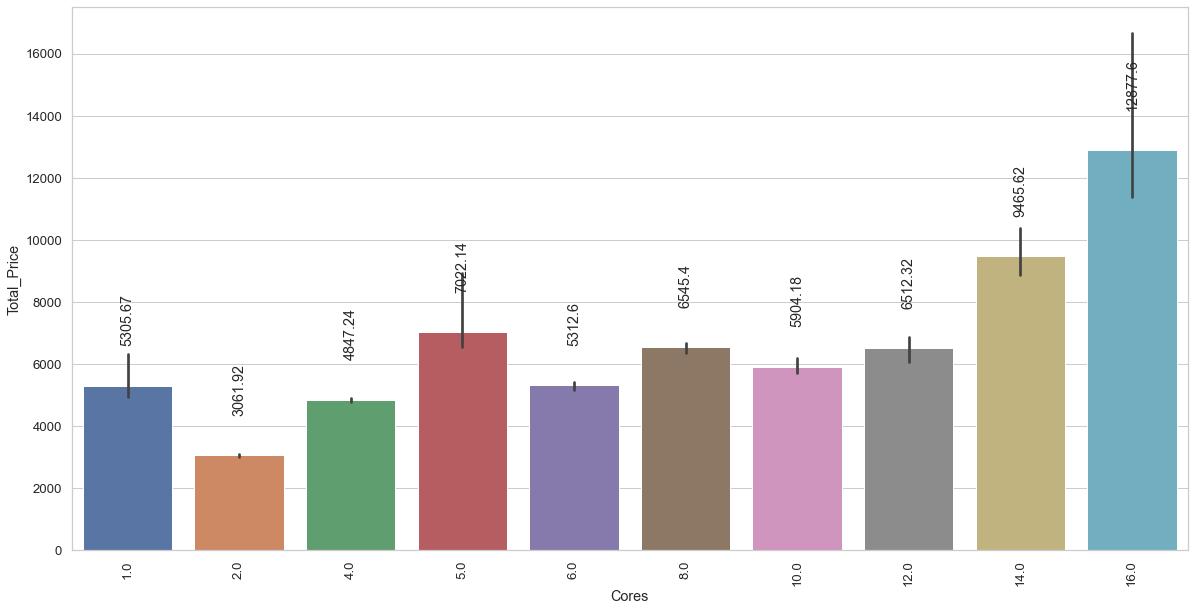

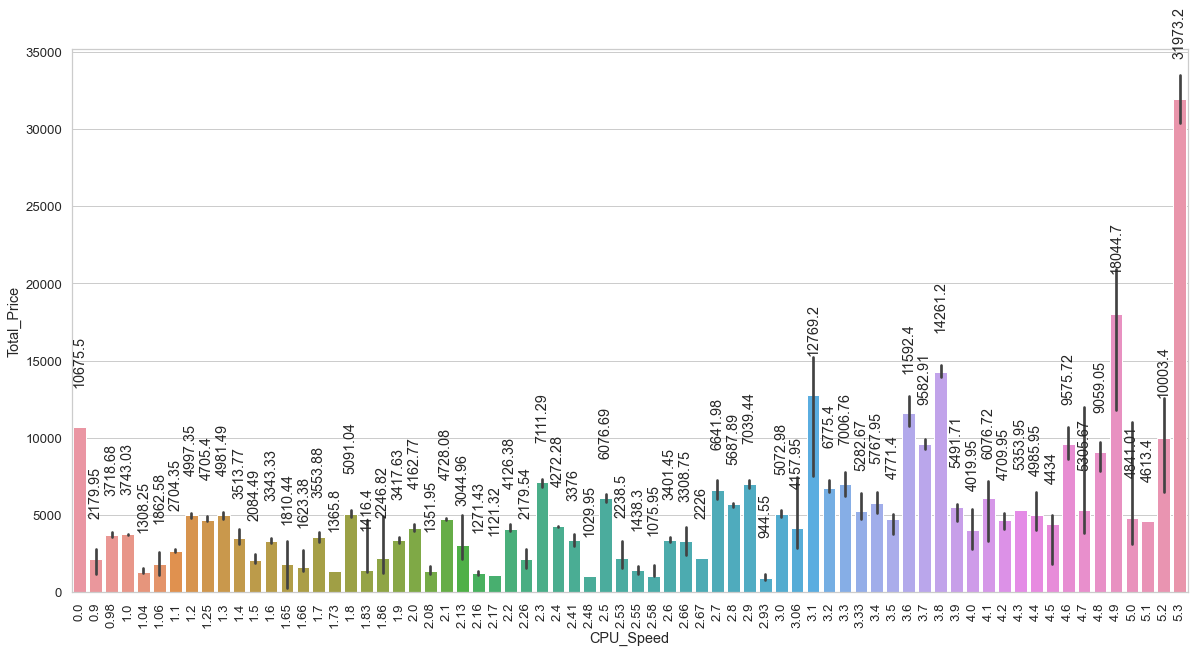

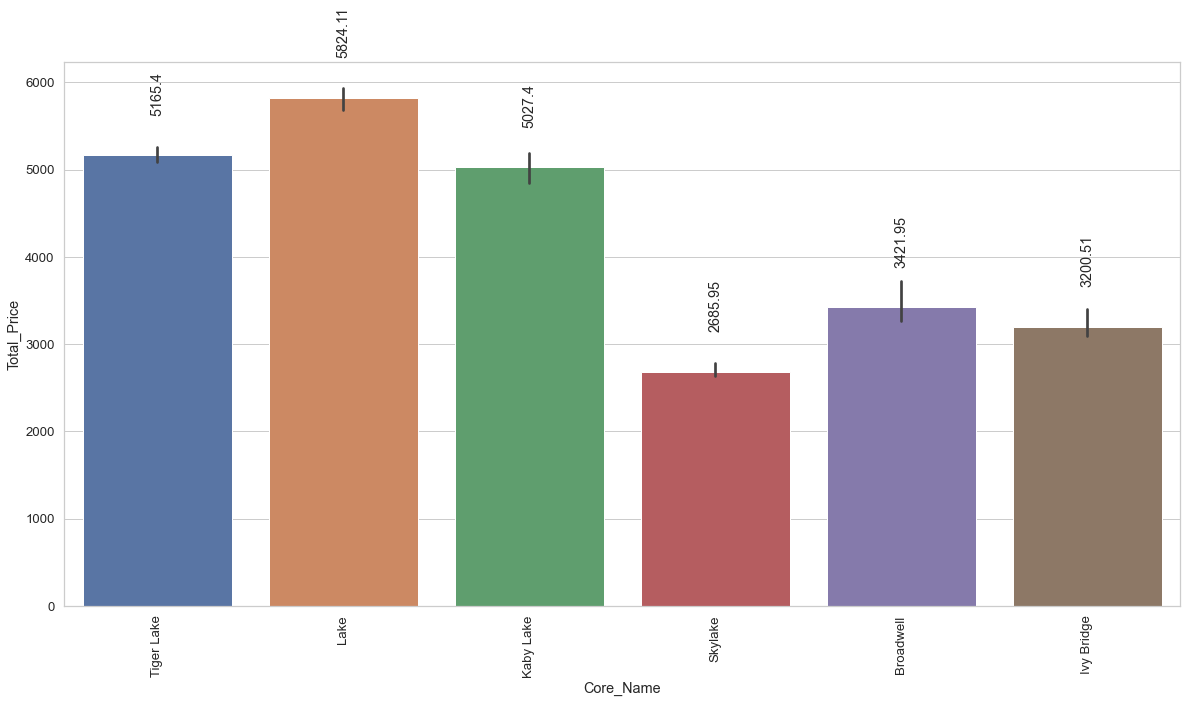

In [ ]:
cpu = ["CPU_Brand", "CPU_Model", "CPU_Series", "CPU_Gen", "Cores",
       "CPU_Speed", "Core_Name"]
# price-CPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not
def Columns_hist(df, columns):
    for column in columns:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        ax = sns.barplot(column, "Total_Price", data=df, estimator=np.median)
        for container in ax.containers:
            ax.bar_label(container, rotation=90, padding=40)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
Columns_hist(All_Data1, cpu)

## GPU

In [ ]:
All_Data1.sample()

Title_Product   Brand                Model              Series  Color  Date_First_Year      Product_Type Product_Style Product_Usage    Weight CPU_Brand CPU_Model CPU_Series CPU_Gen  Cores  CPU_Speed   Core_Name GPU_Brand GPU_Model  Video_Memory Is_SSD  Storage_HDD  Storage_SSD SSD_Type  Memory_capacity Memory_Type  Memory_Speed OS_Corporation      OS_Version  Screen_Size   X_res   Y_res Res_Type Touchscreen WideScreen Screen_Tec WebCam  AC_Power  Battery_Cell  Power_Supply_W Bluetooth  Bluetooth_V Ethernet WiFi_Ver Has_Thunderbolt  Type_C_Count  Type_A_Count  USB_C_Ver  Product_Price_US  Product_Price_SR  Shipping_Price  Total_Price          Product_URL       Product_Images    PPI
13379  Lenovo ThinkPad ...  LENOVO  Aspire 5 A517-52...  ThinkPad P17 Gen 2  Black           2022.0  Labtop Computers          Thin      Business  2.676195     Intel      Core         i9    11th    4.0        2.6  Tiger Lake     Intel        HD           NaN   True          0.0        512.0      NaN             16.0        DDR4           NaN      Microsoft  Windows 11 Pro         17.3  1920.0  1080.0      FHD       False      False        IPS    Yes      45.0           3.0             NaN      True          5.2     True  Wifi 6E            True           0.0           7.0  USB C 3.2            2320.0           11472.0             0.0      11472.0  https://www.newe...  ['https://c1.new...  127.0

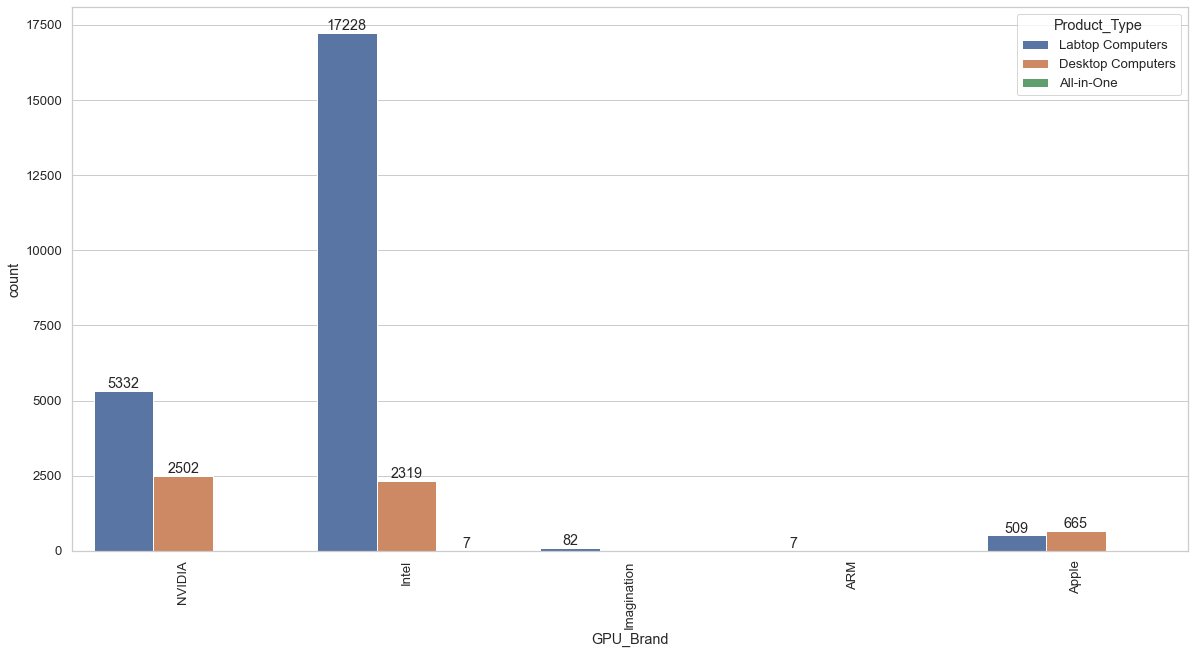

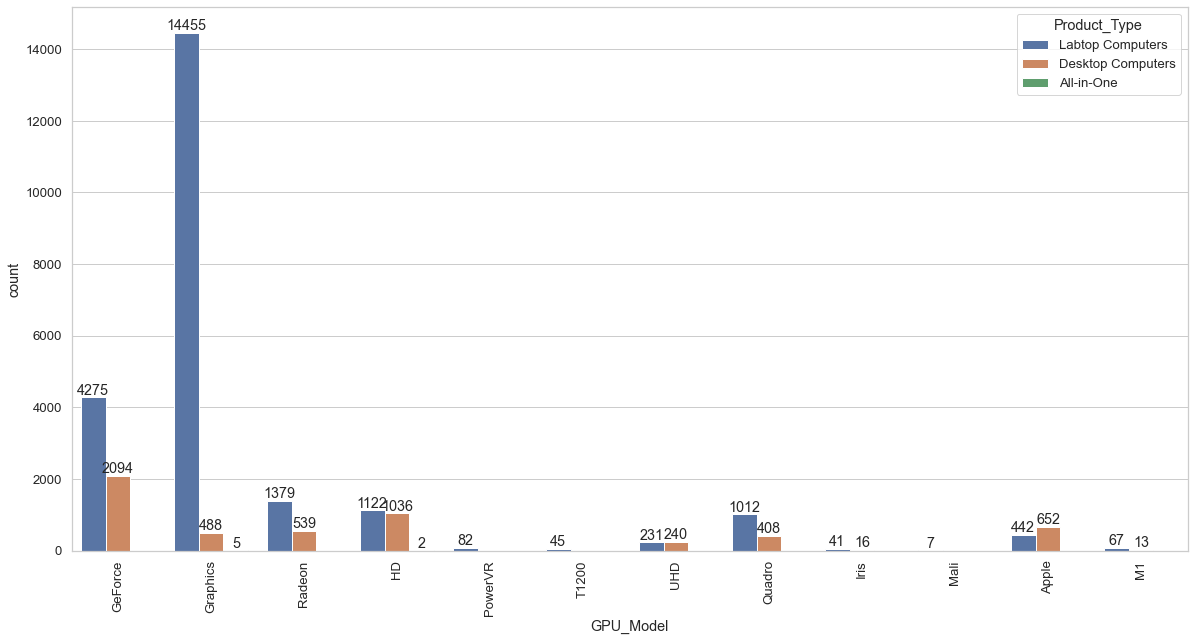

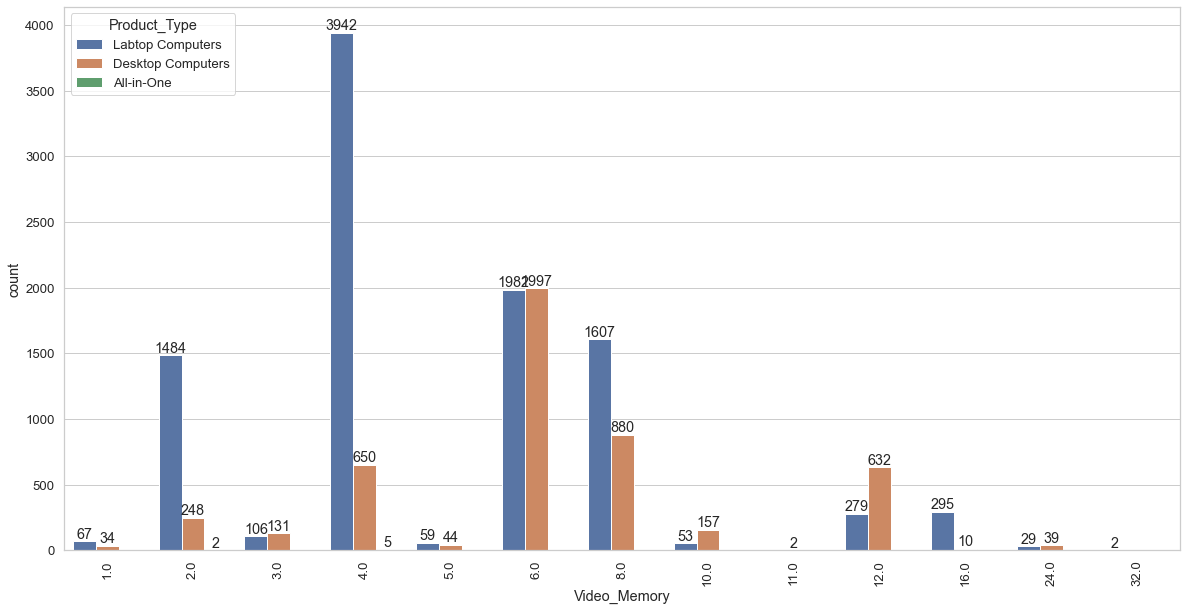

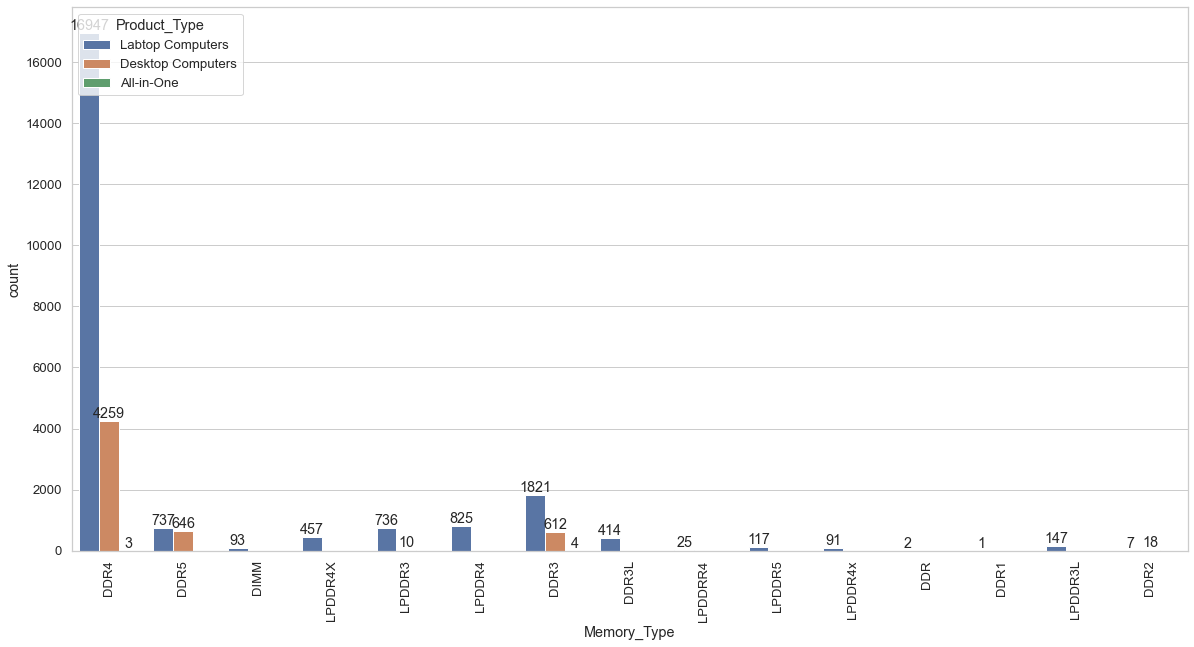

In [ ]:
GPU = ["GPU_Brand", "GPU_Model", "Video_Memory","Memory_Type"]
def Columns_hist(df, columns, h):
    for column in columns:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        ax = sns.countplot(x=column, data=df,hue=h)
        for container in ax.containers:
            ax.bar_label(container)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
Columns_hist(All_Data1, GPU , "Product_Type")


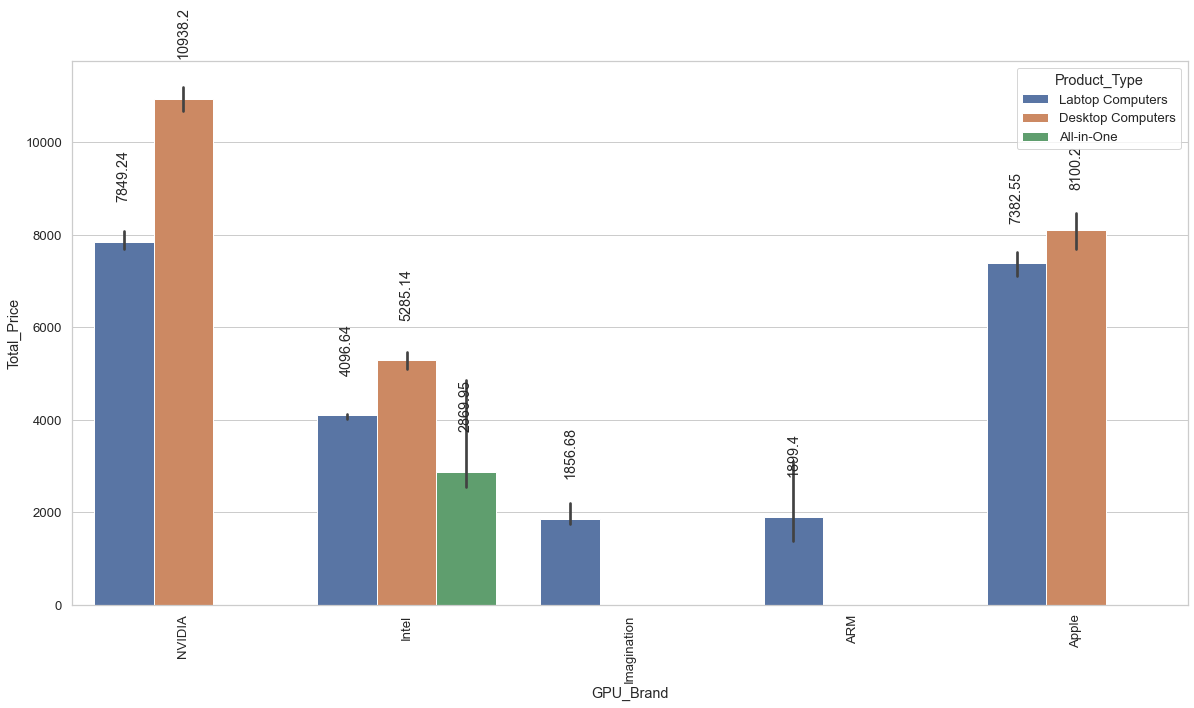

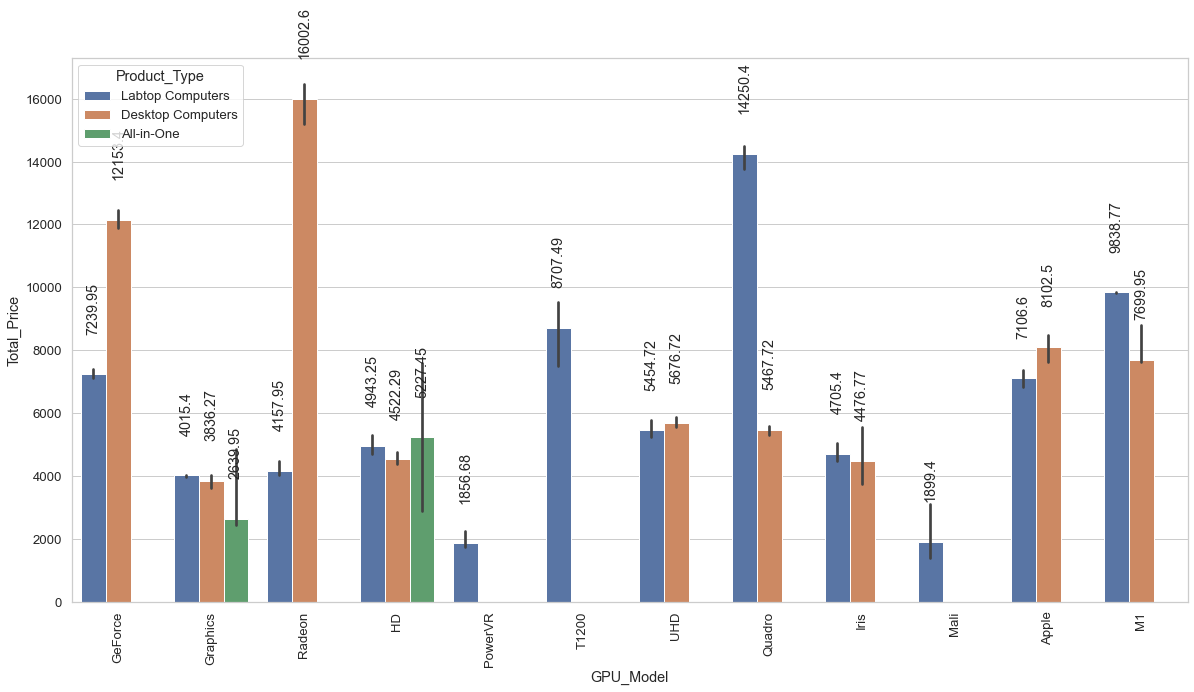

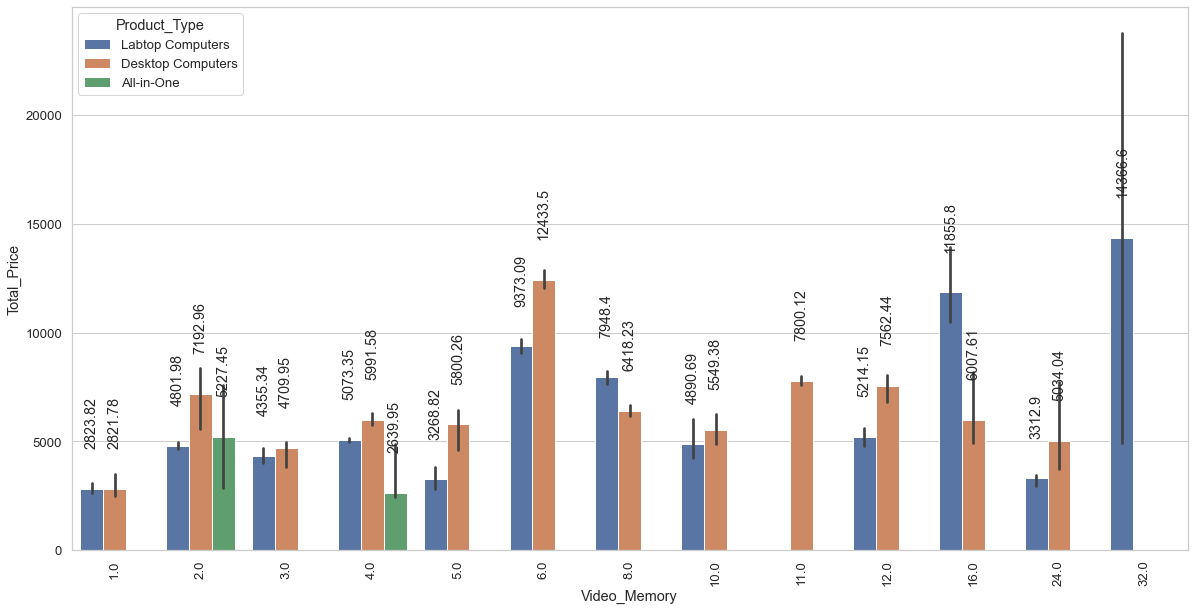

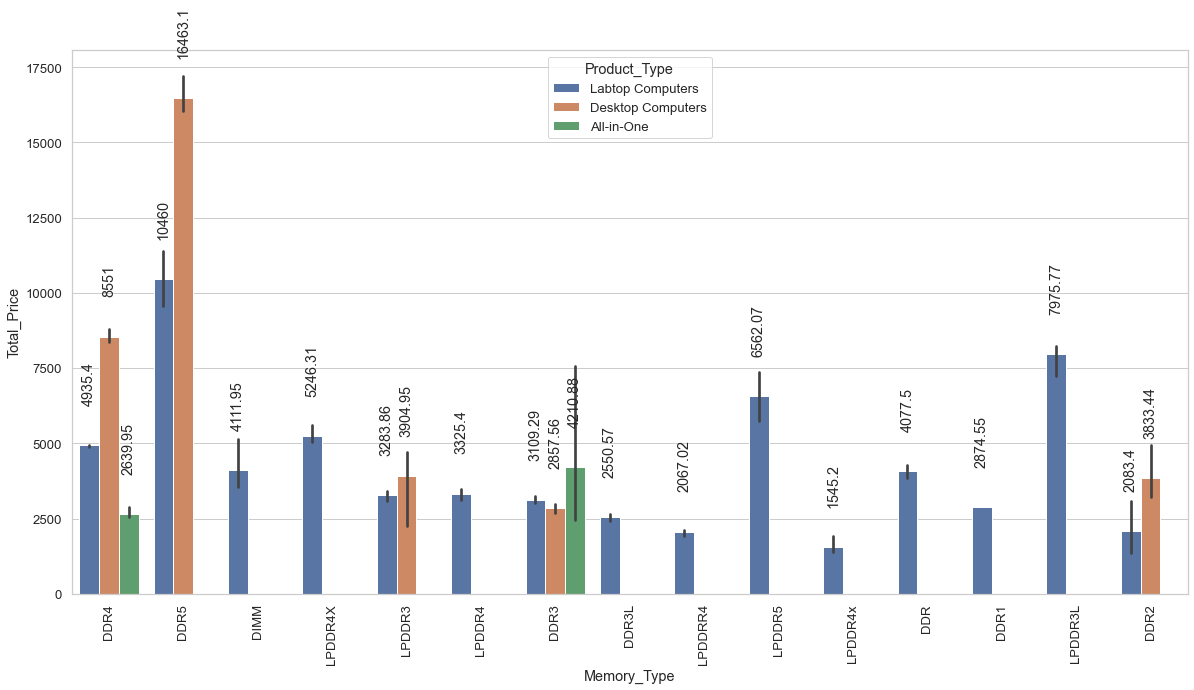

In [ ]:
def Columns_hist(df, columns,h):
    # price-GPU analysis,i used np.median inorder to check if there is any
    # inpact of outlier or not
    for column in columns:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        ax = sns.barplot(column, "Total_Price", data=df,hue=h, estimator=np.median)
        for container in ax.containers:
            ax.bar_label(container, rotation=90, padding=40)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
Columns_hist(All_Data1, GPU, "Product_Type")


## Storage

In [ ]:
All_Data1.sample()

Title_Product Brand Model     Series   Color  Date_First_Year      Product_Type Product_Style Product_Usage   Weight CPU_Brand CPU_Model CPU_Series CPU_Gen  Cores  CPU_Speed Core_Name GPU_Brand GPU_Model  Video_Memory Is_SSD  Storage_HDD  Storage_SSD SSD_Type  Memory_capacity Memory_Type  Memory_Speed OS_Corporation       OS_Version  Screen_Size   X_res   Y_res Res_Type Touchscreen WideScreen Screen_Tec WebCam  AC_Power  Battery_Cell  Power_Supply_W Bluetooth  Bluetooth_V Ethernet WiFi_Ver Has_Thunderbolt  Type_C_Count  Type_A_Count  USB_C_Ver  Product_Price_US  Product_Price_SR  Shipping_Price  Total_Price          Product_URL       Product_Images    PPI
1897  IP 3 14ITL05  ACER    17  Ideapad 1  Silver           2022.0  Labtop Computers          Thin      Personal  1.76901       AMD     Ryzen    Ryzen 3     3rd    2.0        2.6      Lake     Intel    Radeon           NaN   True          0.0        256.0      NaN             16.0        DDR4           NaN      Microsoft  Windows 10 Home         14.0  1920.0  1080.0      FHD       False      False        IPS    Yes     180.0           3.0             NaN     False          NaN     True   Wifi 5            True           3.0           0.0  USB C 3.1        395.997826           1821.59             0.0      1821.59  https://www.newe...  ['https://c1.new...  157.0

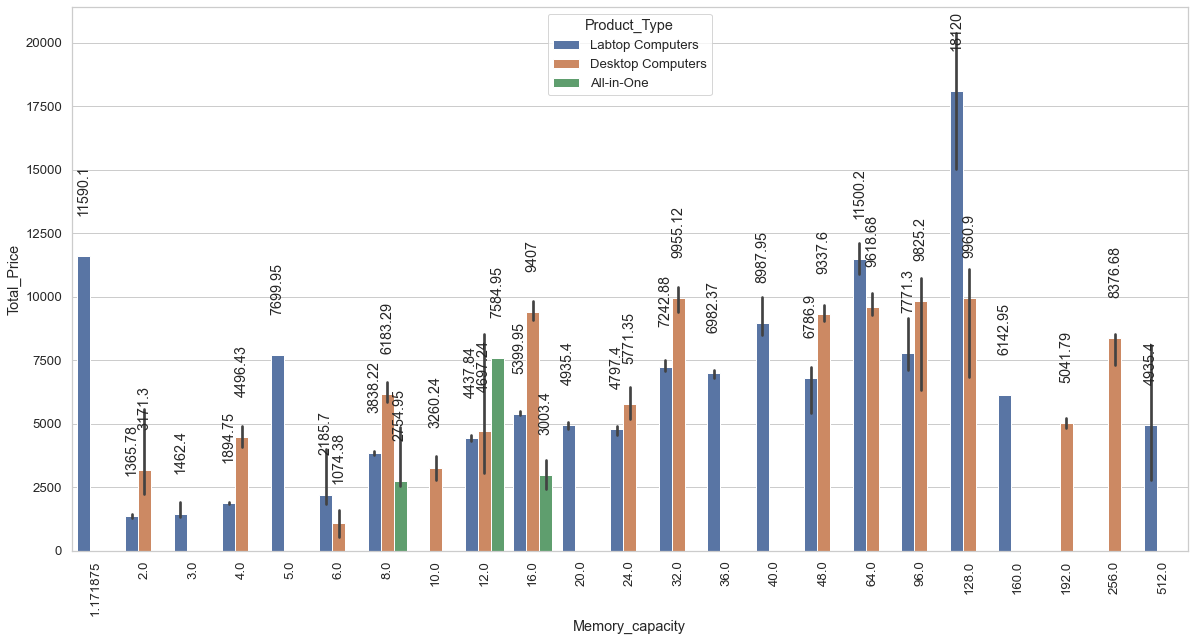

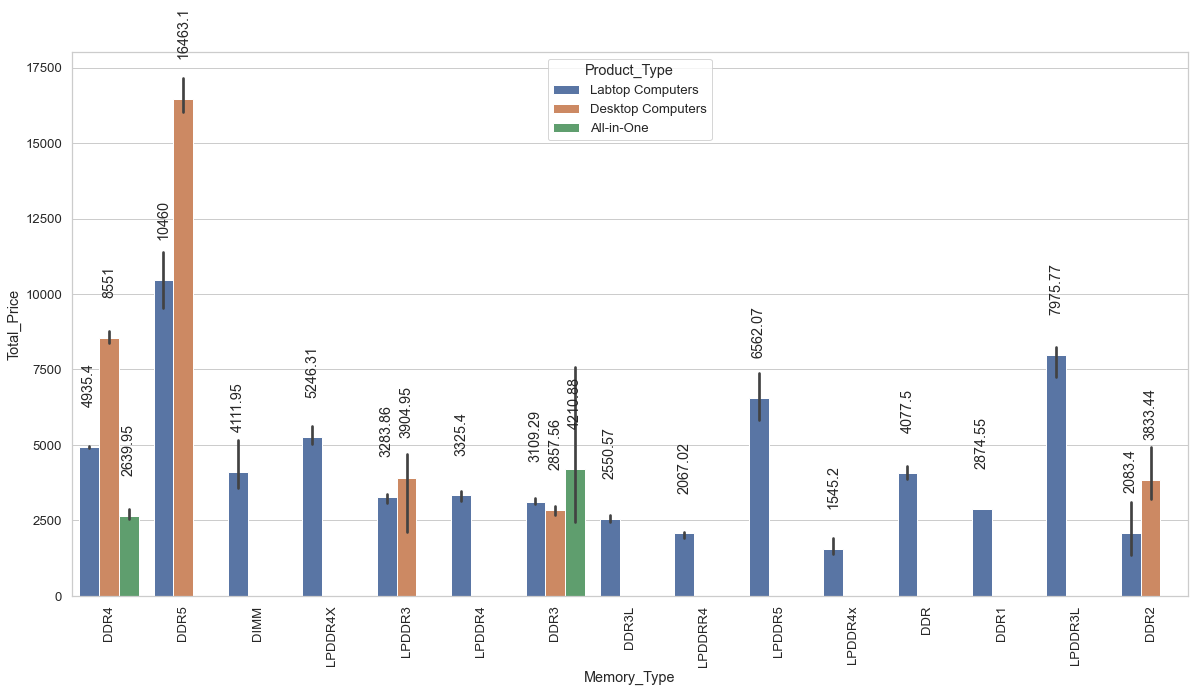

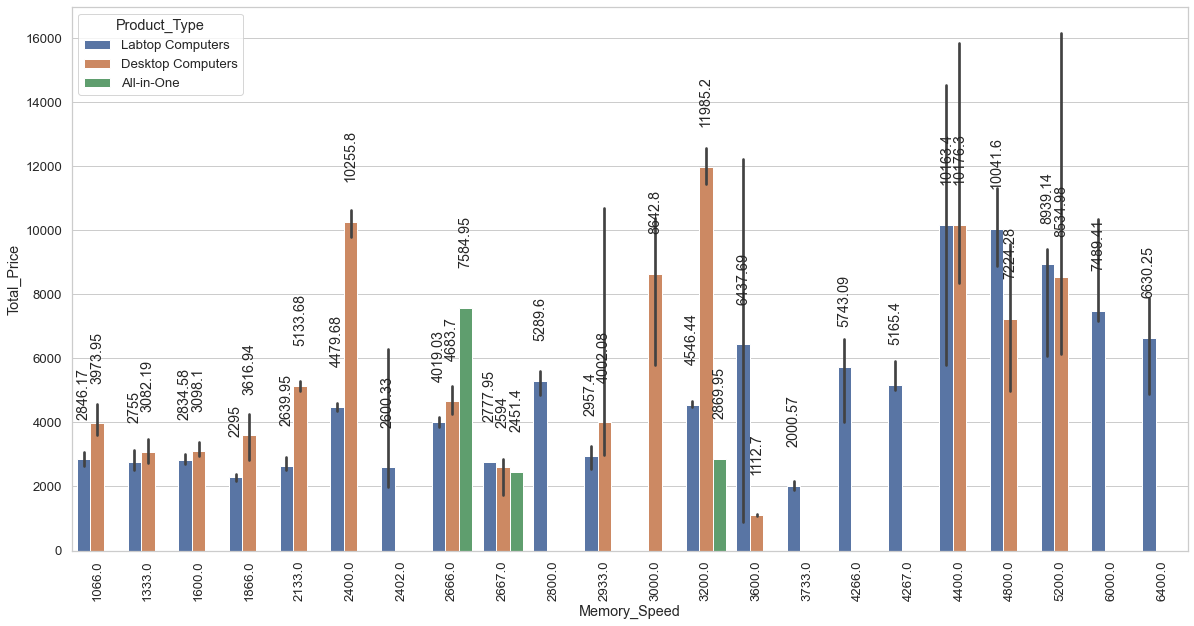

In [ ]:
Memory = ["Memory_capacity", "Memory_Type","Memory_Speed"]
def Columns_hist(df, columns, h):
    # price-Memory analysis,if used np.median inorder to check if there is any
    # inpact of outlier or not
    for column in columns:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        ax = sns.barplot(column, "Total_Price", data=df,
                         hue=h, estimator=np.median)
        for container in ax.containers:
            ax.bar_label(container, rotation=90, padding=40)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
Columns_hist(All_Data1, Memory, "Product_Type")


<AxesSubplot:xlabel='Weight', ylabel='Density'>

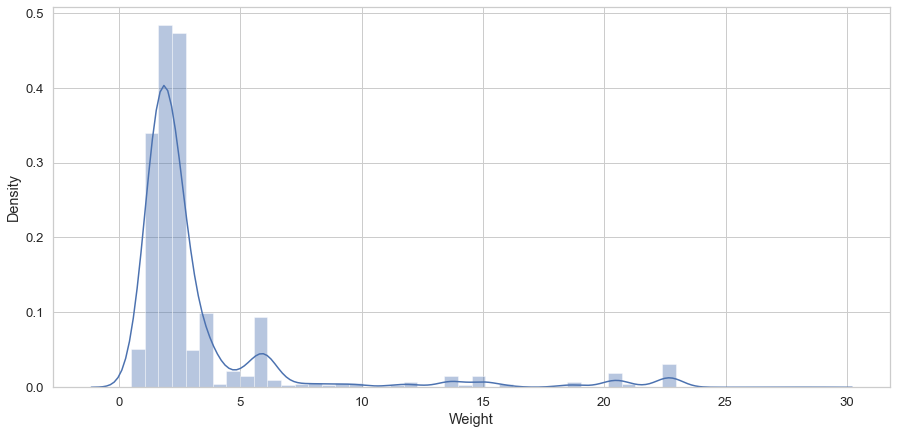

In [ ]:
sns.distplot(All_Data1['Weight'])


<AxesSubplot:xlabel='Weight', ylabel='Total_Price'>

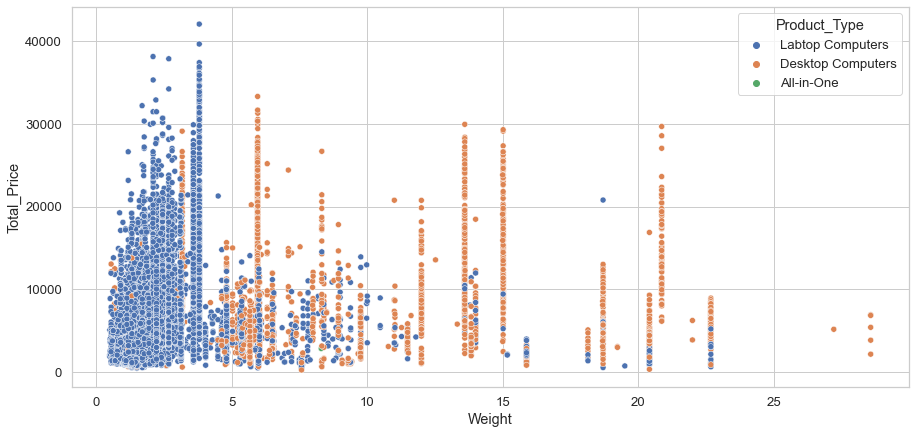

In [ ]:
sns.scatterplot(data=All_Data1,x='Weight' ,y = 'Total_Price' ,hue="Product_Type")

## Price Analysis

<AxesSubplot:xlabel='Total_Price', ylabel='Density'>

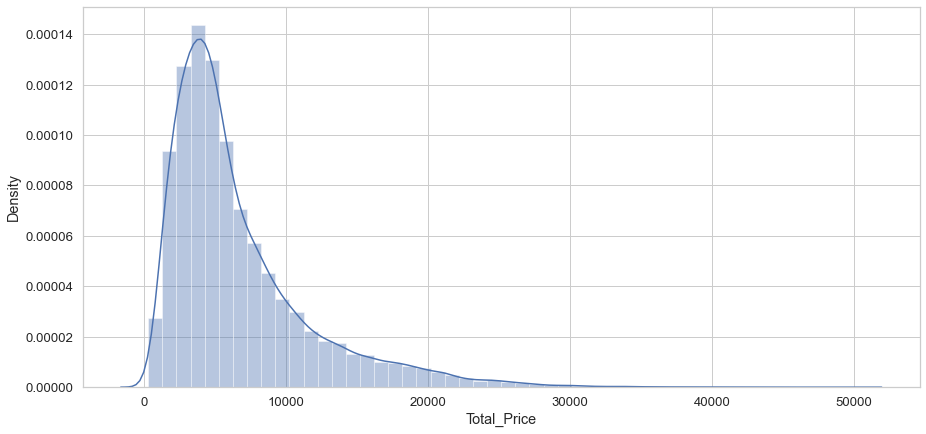

In [ ]:
sns.distplot(All_Data1['Total_Price'])


<AxesSubplot:xlabel='Total_Price', ylabel='Density'>

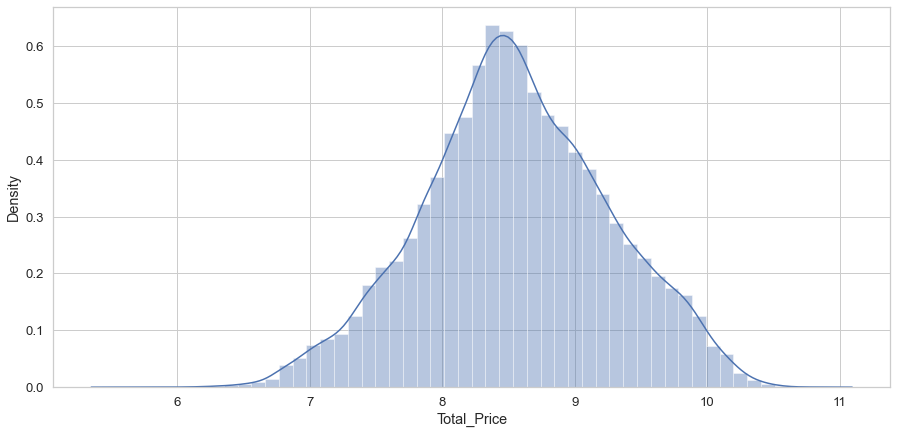

In [ ]:
# so if we apply np.log to the Price col we get a gaussian distibution
sns.distplot(np.log(All_Data1['Total_Price']))


In [ ]:
Labtop.to_csv("../Machine Learning/CSV/Labtop.csv")
Desktop.to_csv("../Machine Learning/CSV/Desktop.csv")
Labtop.to_csv("../Deployment/CSV/Labtop.csv")
Desktop.to_csv("../Deployment/CSV/Desktop.csv")

In [ ]:
Labtop.sample()

Title_Product Brand      Model Series   Color  Date_First_Year      Product_Type Product_Style Product_Usage    Weight CPU_Brand CPU_Model CPU_Series CPU_Gen  Cores  CPU_Speed  Core_Name GPU_Brand GPU_Model  Video_Memory Is_SSD  Storage_HDD  Storage_SSD SSD_Type  Memory_capacity Memory_Type  Memory_Speed OS_Corporation      OS_Version  Screen_Size   X_res  Y_res Res_Type Touchscreen WideScreen Screen_Tec WebCam  AC_Power  Battery_Cell  Power_Supply_W Bluetooth  Bluetooth_V Ethernet WiFi_Ver Has_Thunderbolt  Type_C_Count  Type_A_Count  USB_C_Ver  Product_Price_US  Product_Price_SR  Shipping_Price  Total_Price          Product_URL       Product_Images    PPI
12426  HP 17 Business L...    HP  HP Laptop   17.3  Silver           2019.0  Labtop Computers          Thin      Business  2.630836     Intel      Core         i5     1st    4.0        1.6  Kaby Lake     Intel  Graphics           NaN   True          0.0        500.0     NVMe             32.0        DDR4        2400.0      Microsoft  Windows 10 Pro         17.3  1600.0  900.0      FHD       False      False        IPS    Yes     230.0           8.0             NaN      True          4.2     True   Wifi 5           False           0.0           0.0  USB C 3.1           2099.99         10459.954             0.0     10459.95  https://www.newe...  ['https://c1.new...  106.0

<hr> 

# Finish....